In [1]:
#IMPORTS
%run Functions.ipynb
%run ../datuslib.ipynb
import pandas as pd
import string
import numpy as np
import random
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
import time
import category_encoders as ce
import re
import nltk
from nltk.corpus import stopwords

from transformers import pipeline
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

pd.set_option('display.max_columns', None)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 165: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 165: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 165: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 165: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 165: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 165: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 165: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 165: invalid continuation byte
PROJ: proj_create_from_database: Cannot find proj.db


In [2]:
fe_tr= pd.read_csv("FE_1_train.csv")
fe_tr.drop(columns=["Unnamed: 0","keyword","location","text", 'complete_text',"continent","country","city"], axis=1,inplace = True)
fe_te = pd.read_csv("FE_1_test.csv")
fe_te.drop(columns=["Unnamed: 0","keyword","location","text", 'complete_text',"continent","country","city"], axis=1,inplace = True)
fe_tr

,id,target,hasNum,hasLink,hasUser,hasHashtag,exclamacion,interrogacion,mayusculas,longitud,negativity,sigmoidic_negativity,neg_to_label
0,1,1,False,False,False,True,0,0,10,71,18.941751,8.322630e-01,1
1,4,1,False,False,False,False,0,0,5,40,12.169452,5.649357e-03,0
2,5,1,False,False,False,False,0,0,2,135,129.640889,1.000000e+00,1
3,6,1,True,False,False,True,0,0,1,67,9.270546,3.128562e-04,0
4,7,1,False,False,False,True,0,0,3,90,45.040311,1.000000e+00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,1,True,True,False,False,0,0,7,85,27.594493,9.999648e-01,1
7609,10870,1,False,False,True,False,0,0,6,127,77.448085,1.000000e+00,1
7610,10871,1,True,True,False,False,0,1,10,67,2.495476,3.573592e-07,0
7611,10872,1,False,False,False,False,0,0,4,139,37.510942,1.000000e+00,1


In [3]:
#CARGA DATA
#train = pd.read_csv("../Data/train.csv")
#to_predict = pd.read_csv("../Data/test.csv")

#train_ = pd.read_csv("train_negv2.csv")
#to_predict_ = pd.read_csv("test_negv2.csv")


train = pd.read_csv("train_features_1.csv")
to_predict = pd.read_csv("test_features_1.csv")


#normalizo negatividad
train["negativity"]= fe_tr["negativity"] #/ train_["negativity"].max()
to_predict["negativity"]= fe_te["negativity"] #/ to_predict_["negativity"].max()

 
#train["interrogacion"]= fe_tr["interrogacion"] #/ train_["negativity"].max()
#to_predict["interrogacion"]= fe_te["interrogacion"] #/ to_predict_["negativity"].max()
#train["exclamacion"]= fe_tr["exclamacion"] #/ train_["negativity"].max()
#to_predict["exclamacion"]= fe_te["exclamacion"] #/ to_predict_["negativity"].max()
#train["hasNum"]= fe_tr["hasNum"] #/ train_["negativity"].max()
#to_predict["hasNum"]= fe_te["hasNum"] #/ to_predict_["negativity"].max()

train["len"]= train["len"] #/ 280
to_predict["len"]= to_predict["len"] #/ 280


#train["unique_word_count"]= train["unique_word_count"] / train["word_count"]
#to_predict["unique_word_count"]= to_predict["unique_word_count"] / to_predict["word_count"]

ne_tr.drop(columns=["negativity"], axis=1,inplace = True)
ne_te.drop(columns=["negativity"], axis=1,inplace = True)


train = train.join(ne_tr.set_index('id'), on ="id")
to_predict = to_predict.join(ne_te.set_index('id'), on ="id")

In [4]:
#FEATURES
#features(train, to_predict)

#binary(train, to_predict)

In [5]:
#LIMPIO un poco
#remove(train, to_predict)

#N-PALABRA_
#y, n = asd(train)
#n_grams(y,train,to_predict, 1)

#n_grams(n,train,to_predict, 0)

In [6]:
#NEGATIIDAD Y SENTIMIENTO

#sentimiento = pd.read_csv("sentimiento_train.csv")
#train["sentimiento"] = sentimiento["sentimiento"] 

#negativity = pd.read_csv("negativity_train_1.csv")
#train["negativity"] = negativity["negativity"] 

#sentimiento = pd.read_csv("sentimiento_test.csv")
#to_predict["sentimiento"] = sentimiento["sentimiento"] 

#negativity = pd.read_csv("negativity_test_1.csv")
#to_predict["negativity"] = negativity["negativity"] 

In [7]:
#GUARDO

#train.to_csv('train_features_.csv', index=False)
#to_predict.to_csv('test_features_.csv', index=False)
cero = train[train["target"]==0]

#for linea in cero["text"]:
   # if (str(linea) == "illinois tornado slipped under radar emergency officials say"):
    #    pr =True
    #if (pr == True):
       # print(linea)
uno = train[train["target"]==1]

uno = train[train["target"]==1]
pr = False
for linea in uno["text"]:
    if (str(linea) == "illinois tornado slipped under radar emergency officials say"):
        pr =True
    if (pr == True):
        print(linea)

In [8]:
#SAco ciertos features
train.drop(columns=['3-gram-1', '3-gram-0','2-gram-1', '2-gram-0','1-gram-1', '1-gram-0',"negativity"], axis=1,inplace = True)
to_predict.drop(columns=['3-gram-1', '3-gram-0','2-gram-1', '2-gram-0','1-gram-1', '1-gram-0',"negativity"], axis=1,inplace = True)

In [9]:
listaPalabras = []
archivo = open("NW.txt", "r")
for linea in archivo.readlines():
    linea = linea.rstrip('\n') 
    listaPalabras.append(linea)
archivo.close()


def listaPalabrasDicFrec(listaPalabras):
    frecuenciaPalab = [listaPalabras.count(p) for p in listaPalabras]
    return dict(list(zip(listaPalabras,frecuenciaPalab))),dict(zip(listaPalabras,frecuenciaPalab))

def ordenaDicFrec(dicfrec):
    aux = [(dicfrec[key], key) for key in dicfrec]
    aux.sort()
    aux.reverse()
    return aux

diccionario, d = listaPalabrasDicFrec(listaPalabras)
diccOrdenado = ordenaDicFrec(diccionario)

#for s in diccOrdenado:
#    print(str(s))

In [10]:
def save_dict_to_file(dic,name):
    f = open(name ,'w')
    f.write(str(dic))
    f.close()

def load_dict_from_file(name):
    f = open(name,'r')
    data=f.read()
    f.close()
    return eval(data)
dict_0 = load_dict_from_file("dict_0.txt")
dict_1 = load_dict_from_file("dict_1.txt")

In [11]:
#Frecuencia de palabras de 0 y 1 en diccionarios guardados
#save_dict_to_file(dic_0, "dict_0.txt")
#save_dict_to_file(dic_1, "dict_1.txt")

In [12]:
listaPalabras

['earthquake',
 'forest',
 'fire',
 'wildfires',
 'flooding',
 'emergency',
 'afraid',
 'tornado',
 'died',
 'flooded',
 'flood',
 'crash',
 'ablaze',
 'burned',
 'vandalized',
 'accidentwho',
 'horrible',
 'truckcrash',
 'dies',
 'injury',
 'explosion',
 'die',
 'ambulance',
 'ambulances',
 'annihilated',
 'annihilate',
 'annihilation',
 'annihilating',
 'dieplease',
 'apocalypse',
 'survive',
 'armageddon',
 'warning',
 'salvation',
 'attack',
 'struggling',
 'burglary',
 'death',
 'arson',
 'hospital',
 'arsonist ',
 'bombing',
 'horrific',
 'terrorist',
 'injured',
 'assailant',
 'rape',
 'condemn',
 'bombs',
 'gunfight',
 'attacked',
 'imprisoning',
 'avalanche',
 'war',
 'battle',
 'fight',
 'destroyed',
 'bioterror',
 'wbioterrorismampuse',
 'bioterrorism',
 'disaster',
 'anthrax',
 'blaze',
 'blazing',
 'bleeding',
 'fireball',
 'tragedy',
 'blood',
 'bloody',
 'panics',
 'nuclear',
 'bagging',
 'bodybagging',
 'bags',
 'bomb',
 'gunman',
 'invadedbombed',
 'invaded',
 'bombed'

In [13]:
erere=[]
for k,v in dict_0.items():
    #print (str(k), "esta en ceros: ", k in dic_1)
    if (k not in dict_1):
        erere.append(str(k))
      

In [14]:
dicc ={}
for k,v in dict_0.items():
    if (k not in dict_1):
        dicc[k] = v
        #print (str(k),  "  ", v)
import operator
clients_sort = sorted(dicc.items(), key=operator.itemgetter(1), reverse=True)
clients_sort
    

[('lmao', 16),
 ('king', 15),
 ('career', 13),
 ('aftershock', 12),
 ('louis', 12),
 ('edm', 11),
 ('lucky', 11),
 ('complete', 11),
 ('arianagrande', 11),
 ('shall', 10),
 ('jeb', 10),
 ('bitch', 10),
 ('handbags', 10),
 ('secrets', 9),
 ('welcome', 9),
 ('fantasy', 9),
 ('kindle', 9),
 ('limited', 9),
 ('hilarious', 9),
 ('opening', 9),
 ('disney', 9),
 ('character', 9),
 ('hobbit', 9),
 ('epicentre', 9),
 ('screen', 9),
 ('dnb', 8),
 ('easy', 8),
 ('unless', 8),
 ('beyhive', 8),
 ('facebook', 8),
 ('sale', 8),
 ('guns', 8),
 ('hands', 8),
 ('releases', 8),
 ('somebody', 8),
 ('mary', 8),
 ('wired', 8),
 ('tickets', 8),
 ('justinbieber', 8),
 ('access', 8),
 ('mortal', 8),
 ('kombat', 8),
 ('disco', 8),
 ('icemoon', 7),
 ('djicemoon', 7),
 ('trapmusic', 7),
 ('ices', 7),
 ('choice', 7),
 ('baseball', 7),
 ('minecraft', 7),
 ('bet', 7),
 ('writing', 7),
 ('experience', 7),
 ('universe', 7),
 ('max', 7),
 ('clutch', 7),
 ('hurts', 7),
 ('listening', 7),
 ('vuitton', 7),
 ('flat', 7),
 

In [15]:
laA= []
for w in erere:
  #  print (str(w), "esta en lista: ", w in d)
    if (w not in d):
        laA.append(w)
        print (w)

fruits
goooooooaaaaaal
skiing
wonderful
looooool
wayi
girlfriend
cooool
pasta
phdsquares
mufc
built
hype
acquisitions
doubt
epl
nsfw
visiting
cfc
ancop
tita
vida
soooo
pumped
southridgelife
preaching
gained
stats
tracklist
retainers
wear
superintendent
lanford
noches
elbestia
alexissanchez
teammates
goodnight
gunners
skyline
lips
expecting
fb
filled
revel
wmv
farewell
gtxrwm
progressive
greetings
pens
publications
rene
jacinta
skies
edit
mar
buff
bicycle
testicles
impossible
father
personalinjury
advice
solicitor
otleyhour
stlouis
caraccidentlawyer
speeding
tee
sleepjunkies
pills
gon
wished
spilt
mayonnaise
pissed
donnie
determine
financially
ongoing
flowri
marinading
forward
disciplinary
measuresarrestpastornganga
aftershockdelo
scuf
cya
painful
roger
bannister
icemoon
djicemoon
trapmusic
dnb
ices
dwight
eisenhower
remembers
schulz
harder
triumph
paine
growingupspoiled
clay
pigeon
tc
roller
coaster
disclaimer
kjfordays
wisdomwed
bonus
habits
lifehacks
wiedemer
http
silverwood
streamin

agency
shaken
netlabel
electronicmusic
ccmusic
disillusioned
character
crowe
tropes
nora
jones
empire
markwschaefer
chapoutier
crozes
hermitage
violets
yum
wine
thecomedyquote
thirst
keampurley
michelleellle
spend
overtime
kodak
bobbyxfisher
exofficio
wnd
cld
inst
apch
rwy
oper
taxiways
foxtrot
navbl
tmp
emaaalay
tutor
preferably
aptlyengineerd
reddakushgodd
smfh
daviskawalya
goodbyes
graduated
stupidniggr
cats
decided
damp
qnh
oldest
donthate
rite
tlk
widout
nuh
fi
steal
di
itz
rubbery
knw
bark
judge
dis
wonders
lim
leh
rewatchingthepilot
teamscorpion
bolt
outlet
for
mccauleysdesign
abysmaljoiner
dyamiplotke
purpose
jhaustin
ames
on
asks
passion
overblown
majesty
emperor
salman
khans
unstoppable
bajrangi
bhaijaan
crosed
cyclonereizei
cyclonesama
rindou
vroman
blending
emergencies
cherry
outfit
ootd
doubleghats
thelegendblue
ascend
unions
supportive
economically
gta
collateral
fitness
complaining
emblem
gigant
difficulty
capicapricapri
brentobento
wha
writebothfists
reusing
advanced
eq

trident
pumper
ims
ho
plastic
bedding
sticker
decals
nno
choose
jaymcleanauthor
filipino
lukebox
praying
doningtondash
donington
detkenlang
smartteks
gpsbased
mpers
roadid
juneau
reds
lightly
reserved
hightech
convene
awards
gis
gisuserpr
geotech
badges
resilience
factsheet
int
bridgeportspeed
lender
linkedin
hatcap
silvergray
embroidered
luchaunderground
elreynetwork
fever
summon
directly
fineme
momdies
guest
chachi
kelworldpeace
taxstone
yoga
sbnation
igs
pity
partys
manly
bod
portgassdk
erinmariefishy
flamesnation
optimistic
pivot
pardon
mindless
awickedassassin
hugged
tightly
ell
rubybot
thh
furst
graph
cwhoops
advantages
apropos
favorable
regard
pwhvgwax
cartoonylike
papa
pennies
sumo
wrestler
gain
muaytai
wantmyabsback
zouma
yosemite
sam
drumpf
rabbit
ahuh
cups
lag
conklin
shuffled
hay
masonite
wahpeton
fylde
preston
iconic
disappearing
iamhorsefly
hide
mbiwa
jimmozel
puckflattened
implicit
kainyusanagi
grummz
pixelcanuck
raynor
balding
emo
generic
seanpeconi
jasonfloyd
lynchonsp

kinggerudo
moblins
hed
duh
generational
schism
privacy
bhusa
jihad
all
islamaphobe
illusoria
icarus
playingnow
bloodbound
kristyleemusic
devinjoslyn
types
atlevents
lightumupbeast
waldo
cooperstown
joestrong
gokitgo
heheh
snipe
driller
boxed
relaxing
soothmyslumber
watermeloann
populardemand
wc
weebly
mama
leonalewis
essenceofme
durant
nba
adidas
swingman
jersey
rumbling
noah
rachelrofe
cest
fforecast
fri
vivaargentina
mainly
cloudy
showers
ocd
soonergrunt
brrookkllyynnr
tornadogiveaway
thebookclub
ticklemeshawn
evebrigid
lily
xo
cowgirl
courtney
laudner
teases
panties
skye
horny
juicy
superman
slowpoke
poc
heather
ava
sparxxx
threesome
brunette
stretches
victorian
sofa
marley
brinx
striptease
spreads
pounding
ayshuntornado
giselle
toocodtodd
tulowitzki
hayden
poses
strips
maaaaan
greater
comfortable
sorrowful
redemption
platt
homeworldgym
thisisperidot
monicas
wm
lewis
tanehisicoates
laced
monologue
charlize
coulda
tbr
browsing
homepage
sriramk
commons
ownership
gunning
heartache
aria

In [16]:
prob_words(train,to_predict,listaPalabras,dict_0,dict_1)


### Features y Encoder

In [17]:
train.fillna("NaN", inplace= True)
train['keyword'] = train['keyword'].str.replace('%',' ')
train['keyword'] = train['keyword'].str.replace('2','')
train['keyword'] = train['keyword'].str.replace('0','')

from nlppreprocess import NLP
nlp = NLP()

train['keyword'] = train['keyword'].apply(nlp.process)

In [18]:
import category_encoders as ce



ct =ce.TargetEncoder()
train["key_endoder"]= ct.fit_transform(train["keyword"],train["target"])

le = LabelEncoder()
train["Label_key"] = le.fit_transform(train["keyword"])

y = train['target']

train.drop(columns=['target'], axis=1,inplace = True)

In [19]:
train

,id,keyword,location,text,len,word_count,unique_word_count,url_count,mean_word_length,hashtag_count,mention_count,Kindex,key_bit0,key_bit1,key_bit2,key_bit3,key_bit4,key_bit5,key_bit6,key_bit7,2-gram-1,3-gram-1,2-gram-0,3-gram-0,sentimiento,Puntaje_ser_1,Puntaje_ser_0,key_endoder,Label_key
0,1,NaN,NaN,our deeds are reason earthquake may allah forg...,69,13,13,False,4.384615,1,0,0,0,0,0,0,0,0,0,0,9,7,0,0,1,0.100000,0.900000,0.688525,0
1,4,NaN,NaN,forest fire near la ronge sask canada,38,7,7,False,4.571429,0,0,0,0,0,0,0,0,0,0,0,6,5,2,0,1,0.516484,1.483516,0.688525,0
2,5,NaN,NaN,residents asked shelter in place are being not...,133,22,20,False,5.090909,0,0,0,0,0,0,0,0,0,0,0,18,15,2,0,1,0.200000,0.800000,0.688525,0
3,6,NaN,NaN,people receive wildfires evacuation orders in ...,65,9,8,False,7.125000,1,0,0,0,0,0,0,0,0,0,0,11,5,0,0,1,1.554851,3.445149,0.688525,0
4,7,NaN,NaN,just got sent photo from ruby alaska smoke fro...,88,17,15,False,4.500000,2,0,0,0,0,0,0,0,0,0,0,15,11,2,0,1,1.354851,2.645149,0.688525,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding bridge collapse into ...,83,11,11,True,6.636364,0,0,0,0,0,0,0,0,0,0,0,9,8,3,0,1,0.320000,0.680000,0.688525,0
7609,10870,NaN,NaN,ariaahrary thetawniest out control wild fires ...,125,20,17,False,5.300000,0,2,0,0,0,0,0,0,0,0,0,21,15,5,0,1,0.445714,1.554286,0.688525,0
7610,10871,NaN,NaN,s volcano hawaii,65,8,8,True,7.250000,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,1,0.000000,0.000000,0.688525,0
7611,10872,NaN,NaN,police investigating after ebike collided with...,137,19,19,False,6.263158,0,0,0,0,0,0,0,0,0,0,0,18,15,6,0,1,1.897186,1.102814,0.688525,0


In [ ]:
bi = ce.BinaryEncoder(cols = ["continent","country","city","keyword"],handle_unknown="value")
train = bi.fit_transform(trains)

oh=ce.OneHotEncoder(cols =["Label_key"],handle_unknown="ignore")
train = oh.fit_transform(train)
train

In [345]:
keyword_in_text(train)

train.drop(columns=["location"], axis=1,inplace = True)

train.drop(columns=["text"], axis=1,inplace = True)


#Posibles 1
train["Tiene_key_impor"] = (train["keyword"] == "wreckage") | (train["keyword"] == "debris") | (train["keyword"] == "derailment") 
train["Puntaje_ser_1"]= train["Puntaje_ser_1"] + train["Tiene_key_impor"].map(lambda x: 1  if (x == True) else 0)
train["Tiene_key_impor"] = train["Tiene_key_impor"].map(lambda x: 1 if (x == True) else 0)

train["Es_outbreak"] = (train["keyword"] == "outbreak") 
train["Puntaje_ser_1"]= train["Puntaje_ser_1"] + train["Es_outbreak"].map(lambda x: 0.975  if (x == True) else 0)
train["Puntaje_ser_0"]= train["Puntaje_ser_0"] + train["Es_outbreak"].map(lambda x: 0.025  if (x == False) else 0)
train["Es_outbreak"] = train["keyword"].map(lambda x: 0.975 if (x == True) else 0)

train["Es_oil_split"] = (train["keyword"] == "oil split") 
train["Puntaje_ser_1"]= train["Puntaje_ser_1"] + train["Es_oil_split"].map(lambda x: 0.973  if (x == True) else 0)
train["Puntaje_ser_0"]= train["Puntaje_ser_0"] + train["Es_oil_split"].map(lambda x: 0.027  if (x == False) else 0)
train["Es_oil_split"] = train["keyword"].map(lambda x: 0.973 if (x == True) else 0)

train["Es_typhoon"] = (train["keyword"] == "typhoon") 
train["Puntaje_ser_1"]= train["Puntaje_ser_1"] + train["Es_typhoon"].map(lambda x: 0.973  if (x == True) else 0)
train["Puntaje_ser_0"]= train["Puntaje_ser_0"] + train["Es_typhoon"].map(lambda x: 0.027  if (x == False) else 0)
train["Es_typhoon"] = train["keyword"].map(lambda x: 0.973 if (x == True) else 0)

train["Es_suicide_bombing"] = (train["keyword"] == "suicide bombing") 
train["Puntaje_ser_1"]= train["Puntaje_ser_1"] + train["Es_suicide_bombing"].map(lambda x: 0.969  if (x == True) else 0)
train["Puntaje_ser_0"]= train["Puntaje_ser_0"] + train["Es_suicide_bombing"].map(lambda x: 0.031  if (x == False) else 0)
train["Es_suicide_bombing"] = train["keyword"].map(lambda x: 0.969 if (x == True) else 0)

train["Es_suicide_bomber"] = (train["keyword"] == "suicide bomber") 
train["Puntaje_ser_1"]= train["Puntaje_ser_1"] + train["Es_suicide_bomber"].map(lambda x: 0.967  if (x == True) else 0)
train["Puntaje_ser_0"]= train["Puntaje_ser_0"] + train["Es_suicide_bomber"].map(lambda x: 0.033  if (x == False) else 0)
train["Es_suicide_bomber"] = train["keyword"].map(lambda x: 0.967 if (x == True) else 0)

train["Es_bombing"] = (train["keyword"] == "bombing") 
train["Puntaje_ser_1"]= train["Puntaje_ser_1"] + train["Es_bombing"].map(lambda x: 0.931  if (x == True) else 0)
train["Puntaje_ser_0"]= train["Puntaje_ser_0"] + train["Es_bombing"].map(lambda x: 0.069  if (x == False) else 0)
train["Es_bombing"] = train["keyword"].map(lambda x: 0.931 if (x == True) else 0)

train["Es_suicide bomb"] = (train["keyword"] == "suicide bomb") 
train["Puntaje_ser_1"]= train["Puntaje_ser_1"] + train["Es_suicide bomb"].map(lambda x: 0.914  if (x == True) else 0)
train["Puntaje_ser_0"]= train["Puntaje_ser_0"] + train["Es_suicide bomb"].map(lambda x: 0.086  if (x == False) else 0)
train["Es_suicide bomb"] = train["keyword"].map(lambda x: 0.914 if (x == True) else 0)

train["Es_rescuers"] = (train["keyword"] == "rescuers") 
train["Puntaje_ser_1"]= train["Puntaje_ser_1"] + train["Es_rescuers"].map(lambda x: 0.914  if (x == True) else 0)
train["Puntaje_ser_0"]= train["Puntaje_ser_0"] + train["Es_rescuers"].map(lambda x: 0.086  if (x == False) else 0)
train["Es_rescuers"] = train["keyword"].map(lambda x: 0.914 if (x == True) else 0)

train["Es_nuclear_disaster"] = (train["keyword"] == "nuclear disaster") 
train["Puntaje_ser_1"]= train["Puntaje_ser_1"] + train["Es_nuclear_disaster"].map(lambda x: 0.911  if (x == True) else 0)
train["Puntaje_ser_0"]= train["Puntaje_ser_0"] + train["Es_nuclear_disaster"].map(lambda x: 0.089  if (x == False) else 0)
train["Es_nuclear_disaster"] = train["keyword"].map(lambda x: 0.911 if (x == True) else 0)


#Posibles 0
train["Tiene_key_no_impor"] = (train["keyword"] == "wreckage") | (train["keyword"] == "debris") | (train["keyword"] == "derailment") 
train["Puntaje_ser_0"]= train["Puntaje_ser_0"] + train["Tiene_key_no_impor"].map(lambda x: 1  if (x == True) else 0)
train["Tiene_key_no_impor"] =train["keyword"].map(lambda x: 1 if (x == True) else 0)

train["Es_body bags"] = (train["keyword"] == "body bags") 
train["Puntaje_ser_1"]= train["Puntaje_ser_1"] + train["Es_body bags"].map(lambda x: 0.025  if (x == False) else 0)
train["Puntaje_ser_0"]= train["Puntaje_ser_0"] + train["Es_body bags"].map(lambda x: 0.975  if (x == True) else 0)
train["Es_body bags"] = train["keyword"].map(lambda x: 0.975 if (x == True) else 0)

train["Es_ruin"] = (train["keyword"] == "ruin") 
train["Puntaje_ser_1"]= train["Puntaje_ser_1"] + train["Es_ruin"].map(lambda x: 0.027  if (x == False) else 0)
train["Puntaje_ser_0"]= train["Puntaje_ser_0"] + train["Es_ruin"].map(lambda x: 0.973  if (x == True) else 0)
train["Es_ruin"] = train["keyword"].map(lambda x: 0.973 if (x == True) else 0)

train["Es_blazing"] = (train["keyword"] == "blazing") 
train["Puntaje_ser_1"]= train["Puntaje_ser_1"] + train["Es_blazing"].map(lambda x: 0.030  if (x == False) else 0)
train["Puntaje_ser_0"]= train["Puntaje_ser_0"] + train["Es_blazing"].map(lambda x: 0.970  if (x == True) else 0)
train["Es_blazing"] = train["keyword"].map(lambda x: 0.970 if (x == True) else 0)

train["Es_electrocute"] = (train["keyword"] == "electrocute") 
train["Puntaje_ser_1"]= train["Puntaje_ser_1"] + train["Es_electrocute"].map(lambda x: 0.032  if (x == False) else 0)
train["Puntaje_ser_0"]= train["Puntaje_ser_0"] + train["Es_electrocute"].map(lambda x: 0.968  if (x == True) else 0)
train["Es_electrocute"] = train["keyword"].map(lambda x: 0.968 if (x == True) else 0)

train["Es_traumatised"] = (train["keyword"] == "traumatised") 
train["Puntaje_ser_1"]= train["Puntaje_ser_1"] + train["Es_traumatised"].map(lambda x: 0.058  if (x == False) else 0)
train["Puntaje_ser_0"]= train["Puntaje_ser_0"] + train["Es_traumatised"].map(lambda x: 0.942  if (x == True) else 0)
train["Es_traumatised"] = train["keyword"].map(lambda x: 0.942 if (x == True) else 0)

train["Es_blew_up"] = (train["keyword"] == "blew up") 
train["Puntaje_ser_1"]= train["Puntaje_ser_1"] + train["Es_blew_up"].map(lambda x: 0.061  if (x == False) else 0)
train["Puntaje_ser_0"]= train["Puntaje_ser_0"] + train["Es_blew_up"].map(lambda x: 0.939  if (x == True) else 0)
train["Es_blew_up"] = train["keyword"].map(lambda x: 0.939 if (x == True) else 0)

train["Es_panicking"] = (train["keyword"] == "panicking") 
train["Puntaje_ser_1"]= train["Puntaje_ser_1"] + train["Es_panicking"].map(lambda x: 0.061  if (x == False) else 0)
train["Puntaje_ser_0"]= train["Puntaje_ser_0"] + train["Es_panicking"].map(lambda x: 0.939  if (x == True) else 0)
train["Es_panicking"] = train["keyword"].map(lambda x: 0.939 if (x == True) else 0)

train["Es_body bag"] = (train["keyword"] == "body bag") 
train["Puntaje_ser_1"]= train["Puntaje_ser_1"] + train["Es_body bag"].map(lambda x: 0.030  if (x == False) else 0)
train["Puntaje_ser_0"]= train["Puntaje_ser_0"] + train["Es_body bag"].map(lambda x: 0.970  if (x == True) else 0)
train["Es_body bag"] = train["keyword"].map(lambda x: 0.970 if (x == True) else 0)

train["Es_screaming"] = (train["keyword"] == "screaming") 
train["Puntaje_ser_1"]= train["Puntaje_ser_1"] + train["Es_screaming"].map(lambda x: 0.055  if (x == False) else 0)
train["Puntaje_ser_0"]= train["Puntaje_ser_0"] + train["Es_screaming"].map(lambda x: 0.945  if (x == True) else 0)
train["Es_screaming"] = train["keyword"].map(lambda x: 0.945 if (x == True) else 0)

train["Es_blight"] = (train["keyword"] == "blight") 
train["Puntaje_ser_1"]= train["Puntaje_ser_1"] + train["Es_blight"].map(lambda x: 0.063  if (x == False) else 0)
train["Puntaje_ser_0"]= train["Puntaje_ser_0"] + train["Es_blight"].map(lambda x: 0.937  if (x == True) else 0)
train["Es_blight"] = train["keyword"].map(lambda x: 0.937 if (x == True) else 0)

train["Es_wrecked"] = (train["keyword"] == "wrecked") 
train["Puntaje_ser_1"]= train["Puntaje_ser_1"] + train["Es_wrecked"].map(lambda x: 0.077  if (x == False) else 0)
train["Puntaje_ser_0"]= train["Puntaje_ser_0"] + train["Es_wrecked"].map(lambda x: 0.923  if (x == True) else 0)
train["Es_wrecked"] = train["keyword"].map(lambda x: 0.923 if (x == True) else 0)

train["Es_explode"] = (train["keyword"] == "explode") 
train["Puntaje_ser_1"]= train["Puntaje_ser_1"] + train["Es_explode"].map(lambda x: 0.089  if (x == False) else 0)
train["Puntaje_ser_0"]= train["Puntaje_ser_0"] + train["Es_explode"].map(lambda x: 0.921  if (x == False) else 0)
train["Es_explode"] = train["keyword"].map(lambda x: 0.921 if (x == True) else 0)

train["Es_epicentre"] = (train["keyword"] == "epicentre") 
train["Puntaje_ser_1"]= train["Puntaje_ser_1"] + train["Es_traumatised"].map(lambda x: 0.083  if (x == False) else 0)
train["Puntaje_ser_0"]= train["Puntaje_ser_0"] + train["Es_epicentre"].map(lambda x: 0.917  if (x == True) else 0)
train["Es_epicentre"] = train["keyword"].map(lambda x: 0.917 if (x == True) else 0)

train["Es_panic"] = (train["keyword"] == "panic") 
train["Puntaje_ser_1"]= train["Puntaje_ser_1"] + train["Es_panic"].map(lambda x: 0.081  if (x == False) else 0)
train["Puntaje_ser_0"]= train["Puntaje_ser_0"] + train["Es_panic"].map(lambda x: 0.919  if (x == True) else 0)
train["Es_panic"] = train["keyword"].map(lambda x: 0.919 if (x == True) else 0)

train["Es_bloody"] = (train["keyword"] == "bloody") 
train["Puntaje_ser_1"]= train["Puntaje_ser_1"] + train["Es_panicking"].map(lambda x: 0.086  if (x == False) else 0)
train["Puntaje_ser_0"]= train["Puntaje_ser_0"] + train["Es_bloody"].map(lambda x: 0.914  if (x == True) else 0)
train["Es_bloody"] = train["keyword"].map(lambda x: 0.914 if (x == True) else 0)

train["Es_drown"] = (train["keyword"] == "drown") 
train["Puntaje_ser_1"]= train["Puntaje_ser_1"] + train["Es_drown"].map(lambda x: 0.094  if (x == False) else 0)
train["Puntaje_ser_0"]= train["Puntaje_ser_0"] + train["Es_drown"].map(lambda x: 0.906  if (x == True) else 0)
train["Es_drown"] = train["keyword"].map(lambda x: 0.906 if (x == True) else 0)

train["Es_stretcher"] = (train["keyword"] == "stretcher") 
train["Puntaje_ser_1"]= train["Puntaje_ser_1"] + train["Es_stretcher"].map(lambda x: 0.091  if (x == False) else 0)
train["Puntaje_ser_0"]= train["Puntaje_ser_0"] + train["Es_stretcher"].map(lambda x: 0.909  if (x == True) else 0)
train["Es_stretcher"] = train["keyword"].map(lambda x: 0.909 if (x == True) else 0)

train["Es_collide"] = (train["keyword"] == "collide") 
train["Puntaje_ser_1"]= train["Puntaje_ser_1"] + train["Es_collide"].map(lambda x: 0.089  if (x == False) else 0)
train["Puntaje_ser_0"]= train["Puntaje_ser_0"] + train["Es_collide"].map(lambda x: 0.911  if (x == True) else 0)
train["Es_collide"] = train["keyword"].map(lambda x: 0.911 if (x == True) else 0)

train["Es_smoke"] = (train["keyword"] == "smoke") 
train["Puntaje_ser_1"]= train["Puntaje_ser_1"] + train["Es_smoke"].map(lambda x: 0.089  if (x == False) else 0)
train["Puntaje_ser_0"]= train["Puntaje_ser_0"] + train["Es_smoke"].map(lambda x: 0.911  if (x == True) else 0)
train["Es_smoke"] = train["keyword"].map(lambda x: 0.911 if (x == True) else 0)

train["Es_harm"] = (train["keyword"] == "harm") 
train["Puntaje_ser_1"]= train["Puntaje_ser_1"] + train["Es_smoke"].map(lambda x: 0.097  if (x == False) else 0)
train["Puntaje_ser_0"]= train["Puntaje_ser_0"] + train["Es_harm"].map(lambda x: 0.902  if (x == True) else 0)
train["Es_harm"] = train["keyword"].map(lambda x: 0.903 if (x == True) else 0)

train["Es_drown"] = (train["keyword"] == "drown") 
train["Puntaje_ser_1"]= train["Puntaje_ser_1"] + train["Es_drown"].map(lambda x: 0.094  if (x == False) else 0)
train["Puntaje_ser_0"]= train["Puntaje_ser_0"] + train["Es_drown"].map(lambda x: 0.906  if (x == True) else 0)
train["Es_drown"] = train["keyword"].map(lambda x: 0.906 if (x == True) else 0)



c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [346]:
train.drop(columns=["Kindex"], axis=1,inplace = True)
#train["keyword"] = train["keyword"]/train["keyword"].max()
train.drop(columns=["keyword"], axis=1,inplace = True)

In [347]:
to_predict.fillna("NaN", inplace= True)
to_predict['keyword'] = to_predict['keyword'].str.replace('%',' ')
to_predict['keyword'] = to_predict['keyword'].str.replace('2','')
to_predict['keyword'] = to_predict['keyword'].str.replace('0','')
to_predict['keyword'] = to_predict['keyword'].apply(nlp.process) 


to_predict["key_endoder"]= ct.transform(to_predict["keyword"])

to_predict["Label_key"] = le.transform(to_predict["keyword"])

In [ ]:
to_predict = bi.transform(to_predict)
to_predict

to_predict = oh.transform(to_predict)
to_predict

In [349]:
keyword_in_text(to_predict)

ids = to_predict["id"]

to_predict.drop(columns=["location"], axis=1,inplace = True)

to_predict.drop(columns=["text"], axis=1,inplace = True)


#Posibles 1
to_predict["Tiene_key_impor"] = (to_predict["keyword"] == "wreckage") | (to_predict["keyword"] == "debris") | (to_predict["keyword"] == "derailment") 
to_predict["Puntaje_ser_1"]= to_predict["Puntaje_ser_1"] + to_predict["Tiene_key_impor"].map(lambda x: 1  if (x == True) else 0)
to_predict["Tiene_key_impor"] = to_predict["Tiene_key_impor"].map(lambda x: 1 if (x == True) else 0)

to_predict["Es_outbreak"] = (to_predict["keyword"] == "outbreak") 
to_predict["Puntaje_ser_1"]= to_predict["Puntaje_ser_1"] + to_predict["Es_outbreak"].map(lambda x: 0.975  if (x == True) else 0)
to_predict["Puntaje_ser_0"]= to_predict["Puntaje_ser_0"] + to_predict["Es_outbreak"].map(lambda x: 0.025  if (x == False) else 0)
to_predict["Es_outbreak"] = to_predict["keyword"].map(lambda x: 0.975 if (x == True) else 0)

to_predict["Es_oil_split"] = (to_predict["keyword"] == "oil split") 
to_predict["Puntaje_ser_1"]= to_predict["Puntaje_ser_1"] + to_predict["Es_oil_split"].map(lambda x: 0.973  if (x == True) else 0)
to_predict["Puntaje_ser_0"]= to_predict["Puntaje_ser_0"] + to_predict["Es_oil_split"].map(lambda x: 0.027  if (x == False) else 0)
to_predict["Es_oil_split"] = to_predict["keyword"].map(lambda x: 0.973 if (x == True) else 0)

to_predict["Es_typhoon"] = (to_predict["keyword"] == "typhoon") 
to_predict["Puntaje_ser_1"]= to_predict["Puntaje_ser_1"] + to_predict["Es_typhoon"].map(lambda x: 0.973  if (x == True) else 0)
to_predict["Puntaje_ser_0"]= to_predict["Puntaje_ser_0"] + to_predict["Es_typhoon"].map(lambda x: 0.027  if (x == False) else 0)
to_predict["Es_typhoon"] = to_predict["keyword"].map(lambda x: 0.973 if (x == True) else 0)

to_predict["Es_suicide_bombing"] = (to_predict["keyword"] == "suicide bombing") 
to_predict["Puntaje_ser_1"]= to_predict["Puntaje_ser_1"] + to_predict["Es_suicide_bombing"].map(lambda x: 0.969  if (x == True) else 0)
to_predict["Puntaje_ser_0"]= to_predict["Puntaje_ser_0"] + to_predict["Es_suicide_bombing"].map(lambda x: 0.031  if (x == False) else 0)
to_predict["Es_suicide_bombing"] = to_predict["keyword"].map(lambda x: 0.969 if (x == True) else 0)

to_predict["Es_suicide_bomber"] = (to_predict["keyword"] == "suicide bomber") 
to_predict["Puntaje_ser_1"]= to_predict["Puntaje_ser_1"] + to_predict["Es_suicide_bomber"].map(lambda x: 0.967  if (x == True) else 0)
to_predict["Puntaje_ser_0"]= to_predict["Puntaje_ser_0"] + to_predict["Es_suicide_bomber"].map(lambda x: 0.033  if (x == False) else 0)
to_predict["Es_suicide_bomber"] = to_predict["keyword"].map(lambda x: 0.967 if (x == True) else 0)

to_predict["Es_bombing"] = (to_predict["keyword"] == "bombing") 
to_predict["Puntaje_ser_1"]= to_predict["Puntaje_ser_1"] + to_predict["Es_bombing"].map(lambda x: 0.931  if (x == True) else 0)
to_predict["Puntaje_ser_0"]= to_predict["Puntaje_ser_0"] + to_predict["Es_bombing"].map(lambda x: 0.069  if (x == False) else 0)
to_predict["Es_bombing"] = to_predict["keyword"].map(lambda x: 0.931 if (x == True) else 0)

to_predict["Es_suicide bomb"] = (to_predict["keyword"] == "suicide bomb") 
to_predict["Puntaje_ser_1"]= to_predict["Puntaje_ser_1"] + to_predict["Es_suicide bomb"].map(lambda x: 0.914  if (x == True) else 0)
to_predict["Puntaje_ser_0"]= to_predict["Puntaje_ser_0"] + to_predict["Es_suicide bomb"].map(lambda x: 0.086  if (x == False) else 0)
to_predict["Es_suicide bomb"] = to_predict["keyword"].map(lambda x: 0.914 if (x == True) else 0)

to_predict["Es_rescuers"] = (to_predict["keyword"] == "rescuers") 
to_predict["Puntaje_ser_1"]= to_predict["Puntaje_ser_1"] + to_predict["Es_rescuers"].map(lambda x: 0.914  if (x == True) else 0)
to_predict["Puntaje_ser_0"]= to_predict["Puntaje_ser_0"] + to_predict["Es_rescuers"].map(lambda x: 0.086  if (x == False) else 0)
to_predict["Es_rescuers"] = to_predict["keyword"].map(lambda x: 0.914 if (x == True) else 0)

to_predict["Es_nuclear_disaster"] = (to_predict["keyword"] == "nuclear disaster") 
to_predict["Puntaje_ser_1"]= to_predict["Puntaje_ser_1"] + to_predict["Es_nuclear_disaster"].map(lambda x: 0.911  if (x == True) else 0)
to_predict["Puntaje_ser_0"]= to_predict["Puntaje_ser_0"] + to_predict["Es_nuclear_disaster"].map(lambda x: 0.089  if (x == False) else 0)
to_predict["Es_nuclear_disaster"] = to_predict["keyword"].map(lambda x: 0.911 if (x == True) else 0)


#Posibles 0
to_predict["Tiene_key_no_impor"] = (to_predict["keyword"] == "wreckage") | (to_predict["keyword"] == "debris") | (to_predict["keyword"] == "derailment") 
to_predict["Puntaje_ser_0"]= to_predict["Puntaje_ser_0"] + to_predict["Tiene_key_no_impor"].map(lambda x: 1  if (x == True) else 0)
to_predict["Tiene_key_no_impor"] =to_predict["keyword"].map(lambda x: 1 if (x == True) else 0)

to_predict["Es_body bags"] = (to_predict["keyword"] == "body bags") 
to_predict["Puntaje_ser_1"]= to_predict["Puntaje_ser_1"] + to_predict["Es_body bags"].map(lambda x: 0.025  if (x == False) else 0)
to_predict["Puntaje_ser_0"]= to_predict["Puntaje_ser_0"] + to_predict["Es_body bags"].map(lambda x: 0.975  if (x == True) else 0)
to_predict["Es_body bags"] = to_predict["keyword"].map(lambda x: 0.975 if (x == True) else 0)

to_predict["Es_ruin"] = (to_predict["keyword"] == "ruin") 
to_predict["Puntaje_ser_1"]= to_predict["Puntaje_ser_1"] + to_predict["Es_ruin"].map(lambda x: 0.027  if (x == False) else 0)
to_predict["Puntaje_ser_0"]= to_predict["Puntaje_ser_0"] + to_predict["Es_ruin"].map(lambda x: 0.973  if (x == True) else 0)
to_predict["Es_ruin"] = to_predict["keyword"].map(lambda x: 0.973 if (x == True) else 0)

to_predict["Es_blazing"] = (to_predict["keyword"] == "blazing") 
to_predict["Puntaje_ser_1"]= to_predict["Puntaje_ser_1"] + to_predict["Es_blazing"].map(lambda x: 0.030  if (x == False) else 0)
to_predict["Puntaje_ser_0"]= to_predict["Puntaje_ser_0"] + to_predict["Es_blazing"].map(lambda x: 0.970  if (x == True) else 0)
to_predict["Es_blazing"] = to_predict["keyword"].map(lambda x: 0.970 if (x == True) else 0)

to_predict["Es_electrocute"] = (to_predict["keyword"] == "electrocute") 
to_predict["Puntaje_ser_1"]= to_predict["Puntaje_ser_1"] + to_predict["Es_electrocute"].map(lambda x: 0.032  if (x == False) else 0)
to_predict["Puntaje_ser_0"]= to_predict["Puntaje_ser_0"] + to_predict["Es_electrocute"].map(lambda x: 0.968  if (x == True) else 0)
to_predict["Es_electrocute"] = to_predict["keyword"].map(lambda x: 0.968 if (x == True) else 0)

to_predict["Es_traumatised"] = (to_predict["keyword"] == "traumatised") 
to_predict["Puntaje_ser_1"]= to_predict["Puntaje_ser_1"] + to_predict["Es_traumatised"].map(lambda x: 0.058  if (x == False) else 0)
to_predict["Puntaje_ser_0"]= to_predict["Puntaje_ser_0"] + to_predict["Es_traumatised"].map(lambda x: 0.942  if (x == True) else 0)
to_predict["Es_traumatised"] = to_predict["keyword"].map(lambda x: 0.942 if (x == True) else 0)

to_predict["Es_blew_up"] = (to_predict["keyword"] == "blew up") 
to_predict["Puntaje_ser_1"]= to_predict["Puntaje_ser_1"] + to_predict["Es_blew_up"].map(lambda x: 0.061  if (x == False) else 0)
to_predict["Puntaje_ser_0"]= to_predict["Puntaje_ser_0"] + to_predict["Es_blew_up"].map(lambda x: 0.939  if (x == True) else 0)
to_predict["Es_blew_up"] = to_predict["keyword"].map(lambda x: 0.939 if (x == True) else 0)

to_predict["Es_panicking"] = (to_predict["keyword"] == "panicking") 
to_predict["Puntaje_ser_1"]= to_predict["Puntaje_ser_1"] + to_predict["Es_panicking"].map(lambda x: 0.061  if (x == False) else 0)
to_predict["Puntaje_ser_0"]= to_predict["Puntaje_ser_0"] + to_predict["Es_panicking"].map(lambda x: 0.939  if (x == True) else 0)
to_predict["Es_panicking"] = to_predict["keyword"].map(lambda x: 0.939 if (x == True) else 0)

to_predict["Es_body bag"] = (to_predict["keyword"] == "body bag") 
to_predict["Puntaje_ser_1"]= to_predict["Puntaje_ser_1"] + to_predict["Es_body bag"].map(lambda x: 0.030  if (x == False) else 0)
to_predict["Puntaje_ser_0"]= to_predict["Puntaje_ser_0"] + to_predict["Es_body bag"].map(lambda x: 0.970  if (x == True) else 0)
to_predict["Es_body bag"] = to_predict["keyword"].map(lambda x: 0.970 if (x == True) else 0)

to_predict["Es_screaming"] = (to_predict["keyword"] == "screaming") 
to_predict["Puntaje_ser_1"]= to_predict["Puntaje_ser_1"] + to_predict["Es_screaming"].map(lambda x: 0.055  if (x == False) else 0)
to_predict["Puntaje_ser_0"]= to_predict["Puntaje_ser_0"] + to_predict["Es_screaming"].map(lambda x: 0.945  if (x == True) else 0)
to_predict["Es_screaming"] = to_predict["keyword"].map(lambda x: 0.945 if (x == True) else 0)

to_predict["Es_blight"] = (to_predict["keyword"] == "blight") 
to_predict["Puntaje_ser_1"]= to_predict["Puntaje_ser_1"] + to_predict["Es_blight"].map(lambda x: 0.063  if (x == False) else 0)
to_predict["Puntaje_ser_0"]= to_predict["Puntaje_ser_0"] + to_predict["Es_blight"].map(lambda x: 0.937  if (x == True) else 0)
to_predict["Es_blight"] = to_predict["keyword"].map(lambda x: 0.937 if (x == True) else 0)

to_predict["Es_wrecked"] = (to_predict["keyword"] == "wrecked") 
to_predict["Puntaje_ser_1"]= to_predict["Puntaje_ser_1"] + to_predict["Es_wrecked"].map(lambda x: 0.077  if (x == False) else 0)
to_predict["Puntaje_ser_0"]= to_predict["Puntaje_ser_0"] + to_predict["Es_wrecked"].map(lambda x: 0.923  if (x == True) else 0)
to_predict["Es_wrecked"] = to_predict["keyword"].map(lambda x: 0.923 if (x == True) else 0)

to_predict["Es_explode"] = (to_predict["keyword"] == "explode") 
to_predict["Puntaje_ser_1"]= to_predict["Puntaje_ser_1"] + to_predict["Es_explode"].map(lambda x: 0.089  if (x == False) else 0)
to_predict["Puntaje_ser_0"]= to_predict["Puntaje_ser_0"] + to_predict["Es_explode"].map(lambda x: 0.921  if (x == False) else 0)
to_predict["Es_explode"] = to_predict["keyword"].map(lambda x: 0.921 if (x == True) else 0)

to_predict["Es_epicentre"] = (to_predict["keyword"] == "epicentre") 
to_predict["Puntaje_ser_1"]= to_predict["Puntaje_ser_1"] + to_predict["Es_traumatised"].map(lambda x: 0.083  if (x == False) else 0)
to_predict["Puntaje_ser_0"]= to_predict["Puntaje_ser_0"] + to_predict["Es_epicentre"].map(lambda x: 0.917  if (x == True) else 0)
to_predict["Es_epicentre"] = to_predict["keyword"].map(lambda x: 0.917 if (x == True) else 0)

to_predict["Es_panic"] = (to_predict["keyword"] == "panic") 
to_predict["Puntaje_ser_1"]= to_predict["Puntaje_ser_1"] + to_predict["Es_panic"].map(lambda x: 0.081  if (x == False) else 0)
to_predict["Puntaje_ser_0"]= to_predict["Puntaje_ser_0"] + to_predict["Es_panic"].map(lambda x: 0.919  if (x == True) else 0)
to_predict["Es_panic"] = to_predict["keyword"].map(lambda x: 0.919 if (x == True) else 0)

to_predict["Es_bloody"] = (to_predict["keyword"] == "bloody") 
to_predict["Puntaje_ser_1"]= to_predict["Puntaje_ser_1"] + to_predict["Es_panicking"].map(lambda x: 0.086  if (x == False) else 0)
to_predict["Puntaje_ser_0"]= to_predict["Puntaje_ser_0"] + to_predict["Es_bloody"].map(lambda x: 0.914  if (x == True) else 0)
to_predict["Es_bloody"] = to_predict["keyword"].map(lambda x: 0.914 if (x == True) else 0)

to_predict["Es_drown"] = (to_predict["keyword"] == "drown") 
to_predict["Puntaje_ser_1"]= to_predict["Puntaje_ser_1"] + to_predict["Es_drown"].map(lambda x: 0.094  if (x == False) else 0)
to_predict["Puntaje_ser_0"]= to_predict["Puntaje_ser_0"] + to_predict["Es_drown"].map(lambda x: 0.906  if (x == True) else 0)
to_predict["Es_drown"] = to_predict["keyword"].map(lambda x: 0.906 if (x == True) else 0)

to_predict["Es_stretcher"] = (to_predict["keyword"] == "stretcher") 
to_predict["Puntaje_ser_1"]= to_predict["Puntaje_ser_1"] + to_predict["Es_stretcher"].map(lambda x: 0.091  if (x == False) else 0)
to_predict["Puntaje_ser_0"]= to_predict["Puntaje_ser_0"] + to_predict["Es_stretcher"].map(lambda x: 0.909  if (x == True) else 0)
to_predict["Es_stretcher"] = to_predict["keyword"].map(lambda x: 0.909 if (x == True) else 0)

to_predict["Es_collide"] = (to_predict["keyword"] == "collide") 
to_predict["Puntaje_ser_1"]= to_predict["Puntaje_ser_1"] + to_predict["Es_collide"].map(lambda x: 0.089  if (x == False) else 0)
to_predict["Puntaje_ser_0"]= to_predict["Puntaje_ser_0"] + to_predict["Es_collide"].map(lambda x: 0.911  if (x == True) else 0)
to_predict["Es_collide"] = to_predict["keyword"].map(lambda x: 0.911 if (x == True) else 0)

to_predict["Es_smoke"] = (to_predict["keyword"] == "smoke") 
to_predict["Puntaje_ser_1"]= to_predict["Puntaje_ser_1"] + to_predict["Es_smoke"].map(lambda x: 0.089  if (x == False) else 0)
to_predict["Puntaje_ser_0"]= to_predict["Puntaje_ser_0"] + to_predict["Es_smoke"].map(lambda x: 0.911  if (x == True) else 0)
to_predict["Es_smoke"] = to_predict["keyword"].map(lambda x: 0.911 if (x == True) else 0)

to_predict["Es_harm"] = (to_predict["keyword"] == "harm") 
to_predict["Puntaje_ser_1"]= to_predict["Puntaje_ser_1"] + to_predict["Es_smoke"].map(lambda x: 0.097  if (x == False) else 0)
to_predict["Puntaje_ser_0"]= to_predict["Puntaje_ser_0"] + to_predict["Es_harm"].map(lambda x: 0.902  if (x == True) else 0)
to_predict["Es_harm"] = to_predict["keyword"].map(lambda x: 0.903 if (x == True) else 0)

to_predict["Es_drown"] = (to_predict["keyword"] == "drown") 
to_predict["Puntaje_ser_1"]= to_predict["Puntaje_ser_1"] + to_predict["Es_drown"].map(lambda x: 0.094  if (x == False) else 0)
to_predict["Puntaje_ser_0"]= to_predict["Puntaje_ser_0"] + to_predict["Es_drown"].map(lambda x: 0.906  if (x == True) else 0)
to_predict["Es_drown"] = to_predict["keyword"].map(lambda x: 0.906 if (x == True) else 0)



c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [350]:
to_predict.drop(columns=["Kindex"], axis=1,inplace = True)
#to_predict["keyword"] = to_predict["keyword"]/to_predict["keyword"].max()

to_predict.drop(columns=["keyword"], axis=1,inplace = True)
to_p_1 =to_predict.copy()

### Model Selection and Machine Learning

In [351]:

x_train, x_test, y_train, y_test = train_test_split(train, y, test_size=0.25,random_state=87,shuffle=True)
#X_train = x_train.copy()
x_train.drop(columns=["id"], axis=1,inplace = True)
#X_test = x_test.copy()
x_test.drop(columns=["id"], axis=1,inplace = True)

to_predict.drop(columns=["id"], axis=1,inplace = True)

c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [352]:
print(f"Original shapes: X={train.shape} y={y.shape}")
print(f"Train shapes: X={x_train.shape} y={y_train.shape}")
print(f"Test  shapes: X={x_test.shape}  y={y_test.shape}")



Original shapes: X=(7613, 274) y=(7613,)
Train shapes: X=(5709, 273) y=(5709,)
Test  shapes: X=(1904, 273)  y=(1904,)


### XGBOOST

In [363]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=1100,n_jobs=6,objective="binary:logistic",
                     max_depth= 40,min_child_weight = 1,colsample_bytree=0.1,
                     gamma=1, learning_rate=0.01,subsample= 0.40)
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.1, gamma=1,
              learning_rate=0.01, max_delta_step=0, max_depth=40,
              min_child_weight=1, missing=None, n_estimators=1100, n_jobs=6,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.4, verbosity=1)

In [364]:
start_time = time.time()
model.fit(x_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 12.098639011383057 seconds ---


### Test

In [365]:
evaluate(model, x_train,y_train, x_test, y_test)

Entrenamiento: 85.5491%
Testeo: 77.1008%.
F1 Score:  0.7237008871989862
F1 Score default:  0.7237008871989862


### Predecir

In [366]:
best_predict = model.predict( to_predict )


### Compruebo el F1 Score en Prediccion

In [367]:
comprobar(best_predict)

F1 Score:  0.7634079068342017
F1 Score default:  0.7042145593869732


### Importance Feature

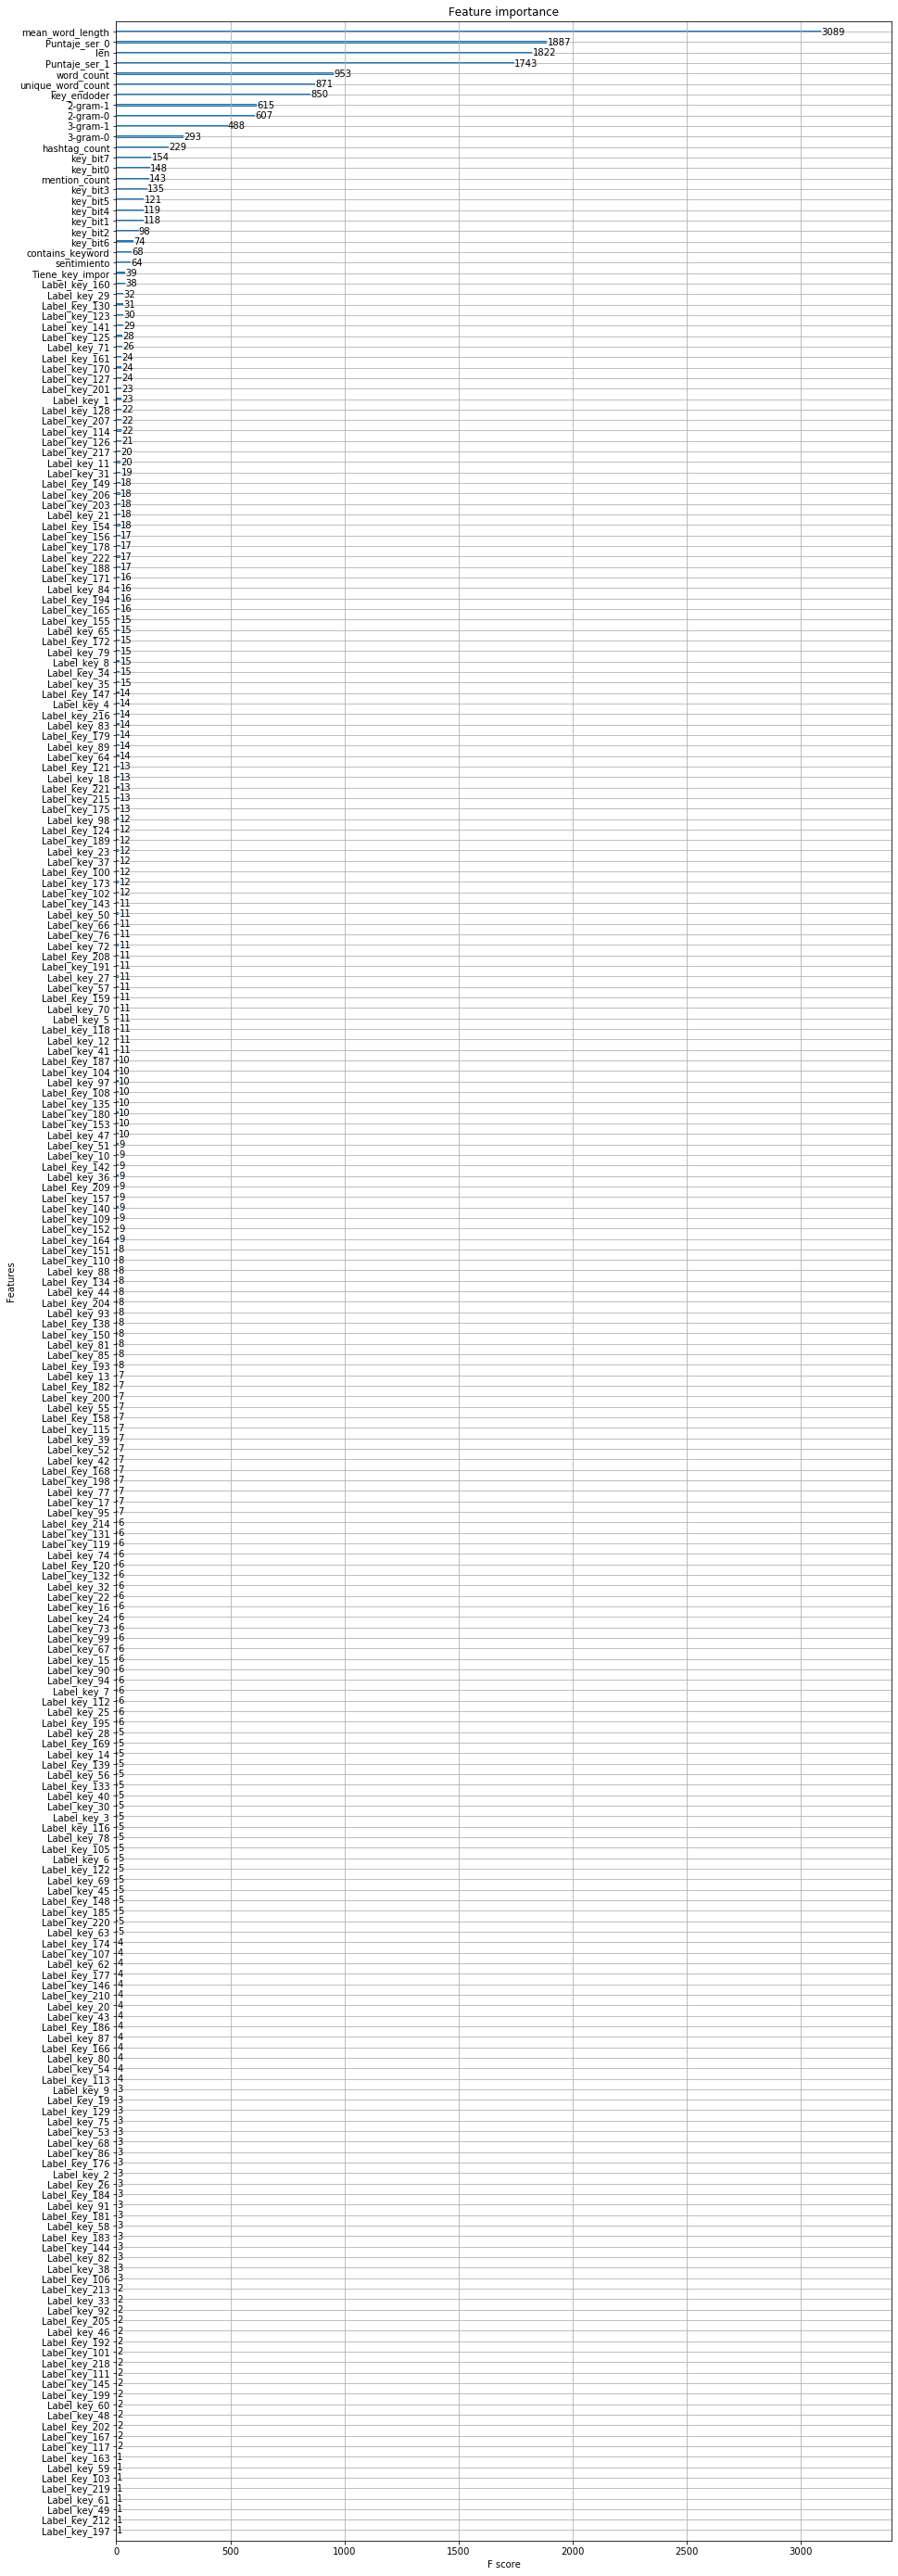

In [205]:
import xgboost as xgb
plt.rcParams["figure.figsize"] = [15, 50]
xgb.plot_importance(model)

### Prediccion anterior como feature

In [ ]:
predicciones = train[["id","target"]]
train["suma_pred"]=0
to_predict["suma_pred"]=0 
to_predict.drop(columns=["id"], axis=1,inplace = True)
import random
for u in range(20):
    from xgboost import XGBClassifier
    print("xgboost: ", u)
    model = XGBClassifier(n_estimators=1000,n_jobs=6,objective="binary:logistic",
                     max_depth= 60,min_child_weight = 1,colsample_bytree=0.09,
                     gamma=3, learning_rate=0.01,subsample= 0.48)
    
    y = train['target']

    x_train, x_test, y_train, y_test = train_test_split(train, y, test_size=0.25,random_state=random.randint(0, 100),shuffle=True)
    X_train = x_train.copy()
    x_train.drop(columns=["id","target"], axis=1,inplace = True)
    X_test = x_test.copy()
    x_test.drop(columns=["id","target"], axis=1,inplace = True)
   
    
    print(f"Original shapes: X={train.shape} y={y.shape}")
    print(f"Train shapes: X={x_train.shape} y={y_train.shape}")
    print(f"Test  shapes: X={x_test.shape}  y={y_test.shape}")
    print("")
    start_time = time.time()
    model.fit(x_train, y_train)
    print("--- %s seconds ---" % (time.time() - start_time))
    print("")
    evaluate(model, x_train,y_train, x_test, y_test)
    
    best_predict = model.predict( to_predict )
    
    comprobar(best_predict)
    print("")
    print("")
    
    X_train["predict_1"] = model.predict(x_train)
    X_train = X_train[["id","predict_1"]]

    X = predicciones.join(X_train.set_index('id'), on ="id")

    X_test["predict_2"] = model.predict(x_test)
    X_test = X_test[["id","predict_2"]]
    predicciones = X.join(X_test.set_index('id'), on ="id")

    predicciones.fillna(0, inplace= True)
    predicciones["predict_v"+str(u)] = predicciones["predict_1"] + predicciones["predict_2"]
    predicciones.drop(columns=["predict_1","predict_2"],inplace = True)

    to_p_1["predict_v"+str(u)] = best_predict
    to_predict["suma_pred"] += best_predict
    
    X_train["predict_1"] = model.predict(x_train)
    X_train = X_train[["id","predict_1"]]

    X = train.join(X_train.set_index('id'), on ="id")

    X_test["predict_2"] = model.predict(x_test)
    X_test = X_test[["id","predict_2"]]
    train = X.join(X_test.set_index('id'), on ="id")

    train.fillna(0, inplace= True)
    train.drop(columns=["predict_1","predict_2"],inplace = True)
    train["suma_pred"]+=train["sentimiento"]
    
    
    
    X_train["predict_1"] = model.predict(x_train)
    X_train = X_train[["id","predict_1"]]

    X = train.join(X_train.set_index('id'), on ="id")

    X_test["predict_2"] = model.predict(x_test)
    X_test = X_test[["id","predict_2"]]
    train = X.join(X_test.set_index('id'), on ="id")

    train.fillna(0, inplace= True)
    train["predict_v"+str(u)] = train["predict_1"] + train["predict_2"]
    train.drop(columns=["predict_1","predict_2"],inplace = True)

    to_predict["predict_v"+str(u)] = best_predict

### Cuales fallo

#### Test

In [360]:
X_test["predict_1"] = model.predict(x_test)

predict_1 = X_test[["predict_1","target","id","sentimiento",\
                   "Puntaje_ser_0","Puntaje_ser_1","contains_keyword"]]

train_1 = pd.read_csv("train_features_.csv")

train_1 = train_1[["id","text","location","keyword"]]

merge = predict_1.merge(train_1, on = 'id')


In [361]:
m= merge[merge["predict_1"] == merge["target"]]
m= m[m["predict_1"] == 1]
m = m[m["contains_keyword"] == True]

In [362]:
#tweets 1 bien predecidos en Test con key en text
m= merge[merge["predict_1"] == merge["target"]]
m= m[m["predict_1"] == 1]
m = m[m["contains_keyword"] == True]
print ("Son ",len(m)," tweets 1 bien predecidos en Test con key en text")
print("")
ma= m[m["Puntaje_ser_0"] > m["Puntaje_ser_1"]]
print("Puntaje mal: ",len(ma))
print("")
for x in range(len(m)):
    print("Lo tiene: ",m.iloc[x]["contains_keyword"])
    print("Lugar: ",m.iloc[x]["location"],"    Key:",m.iloc[x]["keyword"])
    print(m.iloc[x]["text"])
    print("predecido: ",m.iloc[x]["predict_1"], " vs real: ",m.iloc[x]["target"])
    print("Puntaje a ser 0: ",m.iloc[x]["Puntaje_ser_0"], " vs Puntaje a ser 1: ",m.iloc[x]["Puntaje_ser_1"])
    print("")

Son  673  tweets 1 bien predecidos en Test con key en text

Puntaje mal:  163

Lo tiene:  True
Lugar:  Lethbridge, Alberta, Canada     Key: thunderstorm
severe thunderstorm watch ended issued lethbridge
predecido:  1  vs real:  1
Puntaje a ser 0:  1.8377170394617204  vs Puntaje a ser 1:  2.968282960538279

Lo tiene:  True
Lugar:  WorldWide     Key: bombing
australia news japan marks anniversary hiroshima atomic bombing read more
predecido:  1  vs real:  1
Puntaje a ser 0:  1.6332579185520362  vs Puntaje a ser 1:  4.0347420814479635

Lo tiene:  True
Lugar:  Oklahoma City, OK     Key: buildings%20on%20fire
hinton city officials confirm multiple buildings fire currently evacuating people main street our way okcfox
predecido:  1  vs real:  1
Puntaje a ser 0:  2.6797142857142853  vs Puntaje a ser 1:  2.1262857142857143

Lo tiene:  True
Lugar:  United States     Key: hazardous
jax issues hazardous weather outlook hwo wx
predecido:  1  vs real:  1
Puntaje a ser 0:  1.3940000000000001  vs Punt

Lugar:  Menasha, WI     Key: arson
arson suspect linked fires caught in northern california via latimes
predecido:  1  vs real:  1
Puntaje a ser 0:  2.1622949308755763  vs Puntaje a ser 1:  3.6437050691244233

Lo tiene:  True
Lugar:  Washington     Key: evacuation
roosevelt wash under evacuation order due wildfire
predecido:  1  vs real:  1
Puntaje a ser 0:  1.9213809523809524  vs Puntaje a ser 1:  3.884619047619047

Lo tiene:  True
Lugar:  Lincoln, NE     Key: crashed
    bug almost crashed euro
predecido:  1  vs real:  1
Puntaje a ser 0:  2.077006535947713  vs Puntaje a ser 1:  2.7289934640522873

Lo tiene:  True
Lugar:  nan     Key: wreckage
wreckage conclusively confirmed from malaysia pm
predecido:  1  vs real:  1
Puntaje a ser 0:  3.164491803278689  vs Puntaje a ser 1:  2.6415081967213108

Lo tiene:  True
Lugar:  Spokane, WA     Key: drought
worried about how ca drought might affect you extreme weather dampen our economy
predecido:  1  vs real:  1
Puntaje a ser 0:  1.394000000000

Lugar:  In my studio     Key: destroyed
flood two people dead houses destroyed in kaduna two people been reportedly killed and houses ut
predecido:  1  vs real:  1
Puntaje a ser 0:  2.808285714285714  vs Puntaje a ser 1:  3.997714285714285

Lo tiene:  True
Lugar:  ÌÏT: 40.562796,-75.488849     Key: hostage
murfreesboro peeps im hearing walmart s rutherford lockdown with hostage true rumor
predecido:  1  vs real:  1
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar:  nan     Key: cyclone
great condition easton cyclone softball bat fastpitch
predecido:  1  vs real:  1
Puntaje a ser 0:  2.738827586206896  vs Puntaje a ser 1:  2.067172413793103

Lo tiene:  True
Lugar:  Denver, Colorado     Key: collision
motorcyclist bicyclist injured in denver collision broadway
predecido:  1  vs real:  1
Puntaje a ser 0:  2.812114143920595  vs Puntaje a ser 1:  2.993885856079404

Lo tiene:  True
Lugar:  Yellowknife     Key: evacuation
   a voluntary evacuation being 

Puntaje a ser 0:  2.53353488372093  vs Puntaje a ser 1:  4.27246511627907

Lo tiene:  True
Lugar:  nan     Key: nuclear%20disaster
fukushima mutant vegetable images sweep across region two years after nuclear disaster via mailonline
predecido:  1  vs real:  1
Puntaje a ser 0:  2.8442156862745094  vs Puntaje a ser 1:  3.7837843137254894

Lo tiene:  True
Lugar:  nan     Key: collapsed
hour parade like people collapsed oneheartonemindonecss
predecido:  1  vs real:  1
Puntaje a ser 0:  2.3356216216216215  vs Puntaje a ser 1:  2.470378378378378

Lo tiene:  True
Lugar:  Nashville, TN     Key: evacuated
just got evacuated from movie theatre emergency saw people running from another theyre
predecido:  1  vs real:  1
Puntaje a ser 0:  1.909923566878981  vs Puntaje a ser 1:  2.8960764331210185

Lo tiene:  True
Lugar:  Memphis, TN     Key: army
salvation army hosts rally reconnect fathers with children salvation army hosting back school rally  
predecido:  1  vs real:  1
Puntaje a ser 0:  1.39400

Puntaje a ser 0:  2.1558641439205957  vs Puntaje a ser 1:  3.650135856079404

Lo tiene:  True
Lugar:  Naperville     Key: tornado
illinois tornado slipped under radar emergency officials say
predecido:  1  vs real:  1
Puntaje a ser 0:  2.2002461475241426  vs Puntaje a ser 1:  3.6057538524758574

Lo tiene:  True
Lugar:  Nashville, TN     Key: fatality
truck crash in lebanon fatality very sad expect long delays through morning
predecido:  1  vs real:  1
Puntaje a ser 0:  1.8573484162895928  vs Puntaje a ser 1:  2.948651583710407

Lo tiene:  True
Lugar:  Indonesia     Key: blood
wasnt very big stab but deep stab and theres like blood everwhe
predecido:  1  vs real:  1
Puntaje a ser 0:  2.144  vs Puntaje a ser 1:  1.6620000000000001

Lo tiene:  True
Lugar:  nan     Key: devastation
years after atomic bombs japan still struggles with war past anniversary devastation wrought b
predecido:  1  vs real:  1
Puntaje a ser 0:  2.0354835164835166  vs Puntaje a ser 1:  3.770516483516483

Lo tiene:  

Puntaje a ser 0:  2.8442156862745094  vs Puntaje a ser 1:  3.7837843137254894

Lo tiene:  True
Lugar:  nan     Key: lightning
thunder and lightning possible in pinpoint foothill forecast
predecido:  1  vs real:  1
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar:  Unknown     Key: damage
yeah but being fast and doing extremely high damage what its about you want fast then im gonna get u
predecido:  1  vs real:  1
Puntaje a ser 0:  1.8279622641509434  vs Puntaje a ser 1:  1.9780377358490568

Lo tiene:  True
Lugar:  nan     Key: flames
maryland mansion fire killed caused by damaged plug under christmas tree report says into flames
predecido:  1  vs real:  1
Puntaje a ser 0:  3.636154620040668  vs Puntaje a ser 1:  4.169845379959332

Lo tiene:  True
Lugar:  USA (Formerly @usNOAAgov)     Key: drought
droughtmonitor moderate worse drought contig usa affects people
predecido:  1  vs real:  1
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.4


Lo tiene:  True
Lugar:  Rome, Italy     Key: cyclone
now comdev asia radio stations in bangladesh broadcasting programs address upcoming cyclone komen
predecido:  1  vs real:  1
Puntaje a ser 0:  3.738827586206897  vs Puntaje a ser 1:  2.067172413793103

Lo tiene:  True
Lugar:  London     Key: earthquake
there small earthquake in la but not worry emmy rossum fine
predecido:  1  vs real:  1
Puntaje a ser 0:  1.494  vs Puntaje a ser 1:  2.312

Lo tiene:  True
Lugar:  Paris, France     Key: rescuers
rescuers recover body calgary man from lake near vulcan   
predecido:  1  vs real:  1
Puntaje a ser 0:  1.308  vs Puntaje a ser 1:  2.3259999999999996

Lo tiene:  True
Lugar:  Porthcawl     Key: snowstorm
liked youtube video boeing takeoff in snowstorm hd cockpit view atc audio episode
predecido:  1  vs real:  1
Puntaje a ser 0:  2.667504273504273  vs Puntaje a ser 1:  2.1384957264957265

Lo tiene:  True
Lugar:  nan     Key: survived
rt thr rt thrarchives when leo mgm lion survived plane cras

predecido:  1  vs real:  1
Puntaje a ser 0:  2.0076363636363634  vs Puntaje a ser 1:  2.7983636363636357

Lo tiene:  True
Lugar:  nan     Key: twister
its alil twister tha end like oh nah
predecido:  1  vs real:  1
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar:  Portland, Oregon     Key: evacuated
red cross reopens shelter bickleton school after homes evacuated in amp around roosevelt wa due wildfire
predecido:  1  vs real:  1
Puntaje a ser 0:  1.7213809523809525  vs Puntaje a ser 1:  3.0846190476190474

Lo tiene:  True
Lugar:  nan     Key: razed
latest more homes razed by northern california wildfire abc news
predecido:  1  vs real:  1
Puntaje a ser 0:  1.7213809523809525  vs Puntaje a ser 1:  3.0846190476190474

Lo tiene:  True
Lugar:  nan     Key: collided
stupid women nearly collided into today after came out junction not looking still kept coming towards till beep my horn
predecido:  1  vs real:  1
Puntaje a ser 0:  4.040187146187146  vs P

predecido:  1  vs real:  1
Puntaje a ser 0:  1.6712579185520364  vs Puntaje a ser 1:  4.072742081447964

Lo tiene:  True
Lugar:  Alaska, USA     Key: earthquake
usgs eq m e anchorage alaska earthquake
predecido:  1  vs real:  1
Puntaje a ser 0:  1.494  vs Puntaje a ser 1:  2.312

Lo tiene:  True
Lugar:  nan     Key: derailed
itsqueenbaby im work its bunch ppl and buses because train derailed
predecido:  1  vs real:  1
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar:  Nigeria     Key: displaced
angry woman openly accuses nema stealing relief materials meant idps angry internally displaced wom
predecido:  1  vs real:  1
Puntaje a ser 0:  2.7689999999999997  vs Puntaje a ser 1:  2.037

Lo tiene:  True
Lugar:  nan     Key: crashed
my ipod crashed weloveyoulouis mtvhottest one direction
predecido:  1  vs real:  1
Puntaje a ser 0:  4.077006535947713  vs Puntaje a ser 1:  2.7289934640522873

Lo tiene:  True
Lugar:  nan     Key: razed
latest more homes r

Lo tiene:  True
Lugar:  nan     Key: debris
debris found reunion island comes from malaysian pm
predecido:  1  vs real:  1
Puntaje a ser 0:  2.394  vs Puntaje a ser 1:  3.4119999999999995

Lo tiene:  True
Lugar:  America     Key: attacked
christian attacked by muslims temple mount after waving israeli flag via pamela geller
predecido:  1  vs real:  1
Puntaje a ser 0:  2.0628839615668886  vs Puntaje a ser 1:  2.743116038433111

Lo tiene:  True
Lugar:  The Netherlands     Key: tsunami
fukushimatepco mountains debris from japanese tsunami floated west coast
predecido:  1  vs real:  1
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  2.4119999999999995

Lo tiene:  True
Lugar:  nan     Key: trauma
trauma injuries involving kids and sport usually cycling related cbcca
predecido:  1  vs real:  1
Puntaje a ser 0:  2.0076363636363634  vs Puntaje a ser 1:  1.7983636363636366

Lo tiene:  True
Lugar:  nan     Key: demolished
church media and silent when papicongress demolished house journ

In [363]:
#tweets 0 bien predecidos en Test con key en text
m= merge[merge["predict_1"] == merge["target"]]
m= m[m["predict_1"] == 0]
m = m[m["contains_keyword"] == True]
print ("Son ",len(m)," tweets 0 bien predecidos en Test con key en text")
print("")
ma= m[m["Puntaje_ser_1"] > m["Puntaje_ser_0"]]
print("Puntaje mal: ",len(ma))
print("")
for x in range(len(m)):
    print("Lo tiene: ",m.iloc[x]["contains_keyword"])
    print("Lugar: ",m.iloc[x]["location"],"    Key:",m.iloc[x]["keyword"])
    print(m.iloc[x]["text"])
    print("predecido: ",m.iloc[x]["predict_1"], " vs real: ",m.iloc[x]["target"])
    print("Puntaje a ser 0: ",m.iloc[x]["Puntaje_ser_0"], " vs Puntaje a ser 1: ",m.iloc[x]["Puntaje_ser_1"])
    print("")

Son  921  tweets 0 bien predecidos en Test con key en text

Puntaje mal:  398

Lo tiene:  True
Lugar:  San Diego, CA     Key: detonate
apollo brown     detonate ft  mop
predecido:  0  vs real:  0
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar:  6     Key: wrecked
tuneswgg lol u got wrecked
predecido:  0  vs real:  0
Puntaje a ser 0:  3.087491803278689  vs Puntaje a ser 1:  1.5645081967213117

Lo tiene:  True
Lugar:  nan     Key: exploded
im dead my two loves in photo my heart exploded into million pieces brandonskeie samsmithworld
predecido:  0  vs real:  0
Puntaje a ser 0:  1.7377500000000001  vs Puntaje a ser 1:  2.06825

Lo tiene:  True
Lugar:  nan     Key: detonation
ignition knock detonation sensor acdelco gm original equipment
predecido:  0  vs real:  0
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar:  ?semekeepschanging@soyeh?     Key: harm
people keep not tagging self harm and its fucking up
predec

Lo tiene:  True
Lugar:  Morocco     Key: disaster
youssefyamani add fez weather equation and you best recipe disaster
predecido:  0  vs real:  0
Puntaje a ser 0:  2.6292941176470586  vs Puntaje a ser 1:  2.176705882352941

Lo tiene:  True
Lugar:  Saskatchewan, Canada     Key: injuries
jamienye u cant blame coaching management penalties defence injuries cursed probably good way put riders
predecido:  0  vs real:  0
Puntaje a ser 0:  2.0076363636363634  vs Puntaje a ser 1:  1.7983636363636366

Lo tiene:  True
Lugar:  nan     Key: survive
how survive in markets oil investing money trading forex gold silver business
predecido:  0  vs real:  0
Puntaje a ser 0:  3.1013170731707307  vs Puntaje a ser 1:  1.7046829268292685

Lo tiene:  True
Lugar:  nan     Key: survived
thedailyshow mahalo nui loa making my my generation could not survived w bush years without you jonvoyage holomua
predecido:  0  vs real:  0
Puntaje a ser 0:  3.1013170731707307  vs Puntaje a ser 1:  1.7046829268292685

Lo tiene

predecido:  0  vs real:  0
Puntaje a ser 0:  1.909923566878981  vs Puntaje a ser 1:  2.8960764331210185

Lo tiene:  True
Lugar:  å¡å¡Midwest Û¢Û¢     Key: twister
sarahmcpants justjon ill give him titty twister
predecido:  0  vs real:  0
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar:  nan     Key: thunder
one thing like about thunder heheh
predecido:  0  vs real:  0
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar:  nan     Key: terrorism
truth news bbc cnn islam truth god isis terrorism quran lies
predecido:  0  vs real:  0
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar:  Kenya     Key: loud%20bang
breaking news unconfirmed just heard loud bang nearby in what appears blast wind from my neighbours ass
predecido:  0  vs real:  0
Puntaje a ser 0:  2.3939999999999997  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar:  #Gladiator Û¢860Û¢757Û¢     Key: screams
casu

Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar:  Hyrule     Key: threat
kinggerudo largest moblins hed leaving biggest one red and fired with one strike already threat reduced gt
predecido:  0  vs real:  0
Puntaje a ser 0:  2.6797142857142853  vs Puntaje a ser 1:  2.1262857142857143

Lo tiene:  True
Lugar:  nan     Key: blazing
bekahw thanks sweat bullets every time get in with blazing sun beating
predecido:  0  vs real:  0
Puntaje a ser 0:  3.2973333333333334  vs Puntaje a ser 1:  1.4486666666666665

Lo tiene:  True
Lugar:  Killa Hill, CO     Key: quarantine
reddit will now quarantine offensive content reddit cofounder and ceo steve huffman unveiled more specif
predecido:  0  vs real:  0
Puntaje a ser 0:  2.3939999999999997  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar:  Canada     Key: meltdown
you read awesome book yet two trillion dollar meltdown
predecido:  0  vs real:  0
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

predecido:  0  vs real:  0
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar:  Magnolia     Key: displaced
how much would cost fat displaced asking friend
predecido:  0  vs real:  0
Puntaje a ser 0:  3.394  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar:  Los Angeles     Key: pandemonium
pandemonium in aba woman delivers baby without face photos
predecido:  0  vs real:  0
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar:  nan     Key: hellfire
hellfire surrounded by desires careful and don   t let your desires control you afterlife islam
predecido:  0  vs real:  0
Puntaje a ser 0:  1.6797142857142857  vs Puntaje a ser 1:  2.1262857142857143

Lo tiene:  True
Lugar:  nan     Key: collided
my mlg and food worlds collided in ijustine salmon video simple alaskaseafood askforalaska
predecido:  0  vs real:  0
Puntaje a ser 0:  2.6775497835497832  vs Puntaje a ser 1:  2.1284502164502164

Lo tiene:  True
Lugar:  UK 

Lugar:  nan     Key: rubble
chinas stock market crash are there gems in rubble china   s stock market crash summer sparked
predecido:  0  vs real:  0
Puntaje a ser 0:  1.6881176470588235  vs Puntaje a ser 1:  2.1178823529411765

Lo tiene:  True
Lugar:  nan     Key: windstorm
school seven bells windstorm nowplaying
predecido:  0  vs real:  0
Puntaje a ser 0:  1.6675042735042735  vs Puntaje a ser 1:  2.1384957264957265

Lo tiene:  True
Lugar:  Unknown      Key: sinkhole
sinkhole selfies you wont believe whats in brooklyn sinkhole sinkhole selfies you wont belie
predecido:  0  vs real:  0
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar:  nan     Key: crushed
jmastrodonato question would you crush ortiz bunting your sports writing forefathers crushed williams
predecido:  0  vs real:  0
Puntaje a ser 0:  4.208285714285714  vs Puntaje a ser 1:  1.5977142857142856

Lo tiene:  True
Lugar:  Canada Eh!      Key: sirens
raychielovesu block we hear sirensamp

fnaftalkmc stands there engulfed in fire smiling
predecido:  0  vs real:  0
Puntaje a ser 0:  1.6797142857142857  vs Puntaje a ser 1:  2.1262857142857143

Lo tiene:  True
Lugar:  Utah     Key: crush
crush content marketing  mediocrity
predecido:  0  vs real:  0
Puntaje a ser 0:  3.308285714285714  vs Puntaje a ser 1:  1.4977142857142856

Lo tiene:  True
Lugar:  Layang-Layang, Perak     Key: drown
drown by bring horizon information resources centre utp    
predecido:  0  vs real:  0
Puntaje a ser 0:  3.2060000000000004  vs Puntaje a ser 1:  1.2239999999999998

Lo tiene:  True
Lugar:  mi     Key: drown
no one told you can drown yourself by drinking too much water
predecido:  0  vs real:  0
Puntaje a ser 0:  4.2059999999999995  vs Puntaje a ser 1:  1.2239999999999998

Lo tiene:  True
Lugar:  nan     Key: obliteration
ashberxo mindmischief removal traces something obliteration
predecido:  0  vs real:  0
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar

predecido:  0  vs real:  0
Puntaje a ser 0:  3.0766373626373618  vs Puntaje a ser 1:  2.729362637362637

Lo tiene:  True
Lugar:  Indiana     Key: obliteration
god order obliteration ancient canaanites via worldnetdailyhomosexuality downfall society
predecido:  0  vs real:  0
Puntaje a ser 0:  3.1212727272727268  vs Puntaje a ser 1:  1.6847272727272729

Lo tiene:  True
Lugar:  NYC     Key: hurricane
mr t stopped wearing gold chains in because thought would insult people lost everything after hurricane katrina
predecido:  0  vs real:  0
Puntaje a ser 0:  1.719  vs Puntaje a ser 1:  2.0869999999999997

Lo tiene:  True
Lugar:  Peru     Key: injury
sergiopiaggio i   d worked hard get level wasn   t going let injury define going define it    cool
predecido:  0  vs real:  0
Puntaje a ser 0:  2.12372972972973  vs Puntaje a ser 1:  1.6822702702702705

Lo tiene:  True
Lugar:  nan     Key: obliterated
we destroyed zimmerman fan club twitter rzimmermanjr and we obliterated renewsit reduced her soc

youre not injured anymore
predecido:  0  vs real:  0
Puntaje a ser 0:  1.5863076923076922  vs Puntaje a ser 1:  2.2196923076923074

Lo tiene:  True
Lugar:    å_      Key: fire
wcw catsandsyrup tha bitch fire
predecido:  0  vs real:  0
Puntaje a ser 0:  2.6797142857142853  vs Puntaje a ser 1:  2.1262857142857143

Lo tiene:  True
Lugar:  World     Key: whirlwind
pawsox owners public return from whirlwind trip durham knoxville news sentinel
predecido:  0  vs real:  0
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar:  Seattle     Key: inundated
wk rainier diet and my street seward park ave inundated w bypass traffic seattledot whats your plan seattletimes
predecido:  0  vs real:  0
Puntaje a ser 0:  3.4233040293040293  vs Puntaje a ser 1:  2.3826959706959703

Lo tiene:  True
Lugar:  Austin, TX     Key: survived
survived spanish sweet ritual
predecido:  0  vs real:  0
Puntaje a ser 0:  2.101317073170732  vs Puntaje a ser 1:  1.7046829268292685

Lo tien

predecido:  0  vs real:  0
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar:  Worldwide     Key: danger
carsonrex spaceangelseven check out rockin preview claytonbryant danger zone coming soon artistsunited
predecido:  0  vs real:  0
Puntaje a ser 0:  2.44631037489102  vs Puntaje a ser 1:  2.3596896251089796

Lo tiene:  True
Lugar:  Arlington, TX     Key: smoke
barely smoke with people solo my blunts
predecido:  0  vs real:  0
Puntaje a ser 0:  2.305  vs Puntaje a ser 1:  1.323

Lo tiene:  True
Lugar:  Sunny South florida      Key: crushed
wrapup cable tv companies shares crushed after disney disappoints
predecido:  0  vs real:  0
Puntaje a ser 0:  5.208285714285716  vs Puntaje a ser 1:  1.5977142857142856

Lo tiene:  True
Lugar:  ??+ ... ??+     Key: screams
screams
predecido:  0  vs real:  0
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar:  nan     Key: crashed
my son not sleep night finally laid him with 

rt rtrrtcoach love truelove romance lith voodoo seduction astrology rtrrt lotz apocalypse armageddon   
predecido:  0  vs real:  0
Puntaje a ser 0:  3.0287490347490342  vs Puntaje a ser 1:  1.7772509652509654

Lo tiene:  True
Lugar:  Washington, DC     Key: demolition
china detains seven christians trying protect their churchs cross from demolition
predecido:  0  vs real:  0
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar:  come here in 20 minutes for an ass kicking     Key: injuries
in fact yall could tag like small creeping self inflicted injuries skin derma with brackets would nice
predecido:  0  vs real:  0
Puntaje a ser 0:  2.0076363636363634  vs Puntaje a ser 1:  1.7983636363636366

Lo tiene:  True
Lugar:  nan     Key: survived
there are people plotted against are still wondering how survived
predecido:  0  vs real:  0
Puntaje a ser 0:  2.101317073170732  vs Puntaje a ser 1:  1.7046829268292685

Lo tiene:  True
Lugar:  Sunshine Coast, Queen

Lo tiene:  True
Lugar:  nan     Key: weapons
kirstiealley animaladvocate pay photo safari no weapons allowed otherwisethey just like kill something
predecido:  0  vs real:  0
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar:  nan     Key: smoke
smoke with baby and lay with baby and laugh with baby just want simple things
predecido:  0  vs real:  0
Puntaje a ser 0:  2.305  vs Puntaje a ser 1:  1.323

Lo tiene:  True
Lugar:  University Heights, Ohio     Key: blight
cleveland heights shaker heights fight blight house next door
predecido:  0  vs real:  0
Puntaje a ser 0:  2.744793103448276  vs Puntaje a ser 1:  1.9352068965517244

Lo tiene:  True
Lugar:  Thailand     Key: destroy
sapphirescallop destroy oppa image oops theres nothing left right haaaaaa
predecido:  0  vs real:  0
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar:  ??????     Key: desolation
hobbit desolation smaug ed sheeran see fire
predecido:  0 

Lo tiene:  True
Lugar:  New York City     Key: armageddon
photo sketch based taste armageddon episode startrek tos
predecido:  0  vs real:  0
Puntaje a ser 0:  2.2858918918918922  vs Puntaje a ser 1:  1.5201081081081078

Lo tiene:  True
Lugar:  nan     Key: pandemonium
world class tgirl ass scene pandemonium
predecido:  0  vs real:  0
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar:  Paris.     Key: siren
nowplaying song siren john frusciante
predecido:  0  vs real:  0
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar:  nan     Key: hellfire
beware your temper and loose tongue these two dangerous weapons combined can lead person hellfire islam
predecido:  0  vs real:  0
Puntaje a ser 0:  3.772081378081378  vs Puntaje a ser 1:  3.033918621918622

Lo tiene:  True
Lugar:  ÌÏT: -26.695807,27.837865     Key: dead
lmaovv hard ny new trend babalmaowelcome nyozi kwaaaaadead
predecido:  0  vs real:  0
Puntaje a ser 0:

Lo tiene:  True
Lugar:  Waukesha, WI     Key: blizzard
really wants rolo blizzard but mom said no guess no dq tonight
predecido:  0  vs real:  0
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar:  Malaysia     Key: bloody
aggressif bloody aggressive
predecido:  0  vs real:  0
Puntaje a ser 0:  3.898909090909091  vs Puntaje a ser 1:  1.8210909090909093

Lo tiene:  True
Lugar:  the burrow     Key: mudslide
dorette thats name mudslide cake maker
predecido:  0  vs real:  0
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar:  MA     Key: bombed
misfitrarity misfit got bombed
predecido:  0  vs real:  0
Puntaje a ser 0:  2.215703296703297  vs Puntaje a ser 1:  2.5902967032967026

Lo tiene:  True
Lugar:  Dublin     Key: rioting
new doco tonight setanta sports ireland freeview largest police presence soccer game in ireland stop prevent rioting
predecido:  0  vs real:  0
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a 

predecido:  0  vs real:  0
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar:  marvel | books | hp | tmr     Key: screams
screams in different languages
predecido:  0  vs real:  0
Puntaje a ser 0:  2.3939999999999997  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar:  Alameda and Pleasanton, CA     Key: injuries
new type adhd head injuries in children linked longterm attention problems
predecido:  0  vs real:  0
Puntaje a ser 0:  2.0076363636363634  vs Puntaje a ser 1:  1.7983636363636366

Lo tiene:  True
Lugar:  nan     Key: blood
man somebody gotta stop sbee dude too fuckin funny blood
predecido:  0  vs real:  0
Puntaje a ser 0:  3.1439999999999992  vs Puntaje a ser 1:  1.6620000000000001

Lo tiene:  True
Lugar:  Itirapina, SÌ£o Paulo     Key: blood
rolandonabeats ellie goulding my blood acesse nosso site para ouvir
predecido:  0  vs real:  0
Puntaje a ser 0:  3.1439999999999992  vs Puntaje a ser 1:  1.6620000000000001

Lo tiene:  True
Lugar:  B

achievement unlocked replaced light socket not electrocute self
predecido:  0  vs real:  0
Puntaje a ser 0:  2.362  vs Puntaje a ser 1:  1.38

Lo tiene:  True
Lugar:  Winnipeg     Key: explode
im ready explode
predecido:  0  vs real:  0
Puntaje a ser 0:  0.473  vs Puntaje a ser 1:  1.323

Lo tiene:  True
Lugar:  Hermitage, PA     Key: windstorm
chriscesq average gop voter would go bigtent circus in hailstormwindstorm no
predecido:  0  vs real:  0
Puntaje a ser 0:  1.6675042735042735  vs Puntaje a ser 1:  2.1384957264957265

Lo tiene:  True
Lugar:  nan     Key: eyewitness
eyewitness media actively embraced by uk audiences read report by emhub impact ugc in news
predecido:  0  vs real:  0
Puntaje a ser 0:  3.060666666666666  vs Puntaje a ser 1:  1.7453333333333334

Lo tiene:  True
Lugar:  access to njh/5 and cth/4     Key: screaming
during drag last night screaming shell mannequin instead shell man and think everyone hated there
predecido:  0  vs real:  0
Puntaje a ser 0:  3.199465116279

Lugar:  beijing .China     Key: injury
rory mcilroy test ankle injury in weekend practice chinadotcom sports
predecido:  0  vs real:  0
Puntaje a ser 0:  2.12372972972973  vs Puntaje a ser 1:  1.6822702702702705

Lo tiene:  True
Lugar:  nan     Key: damage
reusing advanced in life equipments in transit drumming champaign damage fdbdp
predecido:  0  vs real:  0
Puntaje a ser 0:  1.8279622641509434  vs Puntaje a ser 1:  1.9780377358490568

Lo tiene:  True
Lugar:  dublin      Key: traumatised
hes still traumatised
predecido:  0  vs real:  0
Puntaje a ser 0:  2.3360000000000003  vs Puntaje a ser 1:  1.3539999999999999

Lo tiene:  True
Lugar:  Florida     Key: police
episcopal priests road trip with interracial family shares harrowing story police harassment via dailykos
predecido:  0  vs real:  0
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar:  Ashburn, VA     Key: sunk
damn theres really no mlk center hasnt sunk in yet
predecido:  0  vs real:  0
Pu

In [364]:
#tweets 1 bien predecidos en Test sin key en text
m= merge[merge["predict_1"] == merge["target"]]
m= m[m["predict_1"] == 1]
m = m[m["contains_keyword"] == False]
print ("Son ",len(m)," tweets 1 bien predecidos en Test sin key en text")
print("")
ma= m[m["Puntaje_ser_0"] > m["Puntaje_ser_1"]]
print("Puntaje mal: ",len(ma))
print("")
for x in range(len(m)):
    print("Lo tiene: ",m.iloc[x]["contains_keyword"])
    print("Lugar: ",m.iloc[x]["location"],"    Key:",m.iloc[x]["keyword"])
    print(m.iloc[x]["text"])
    print("predecido: ",m.iloc[x]["predict_1"], " vs real: ",m.iloc[x]["target"])
    print("Puntaje a ser 0: ",m.iloc[x]["Puntaje_ser_0"], " vs Puntaje a ser 1: ",m.iloc[x]["Puntaje_ser_1"])
    print("")

Son  100  tweets 1 bien predecidos en Test sin key en text

Puntaje mal:  29

Lo tiene:  False
Lugar:  nan     Key: annihilated
cop pulls drunk driver safety seconds before his car hit by train via viralspell
predecido:  1  vs real:  1
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  False
Lugar:  Roanoke, VA     Key: buildings%20on%20fire
now wsls fire burns multiple buildings in montgomery co tips make childcare less expensive amp rain join jennasjems patrickwsls
predecido:  1  vs real:  1
Puntaje a ser 0:  3.2251688311688307  vs Puntaje a ser 1:  2.580831168831168

Lo tiene:  False
Lugar:  nan     Key: buildings%20burning
can probably skip these basic life maintenance things few days cut burning buildings people screaming in streets
predecido:  1  vs real:  1
Puntaje a ser 0:  4.262104535683195  vs Puntaje a ser 1:  2.5438954643168046

Lo tiene:  False
Lugar:  nan     Key: hailstorm
more wicked weather rolls through calgary and surrounding areas
predecido

predecido:  1  vs real:  1
Puntaje a ser 0:  3.0008376068376066  vs Puntaje a ser 1:  2.8051623931623926

Lo tiene:  False
Lugar:  Marbella. Spain     Key: nuclear%20disaster
another disaster waiting happen and your allowing
predecido:  1  vs real:  1
Puntaje a ser 0:  2.5402941176470586  vs Puntaje a ser 1:  3.087705882352941

Lo tiene:  False
Lugar:  Get our App     Key: wildfire
fire in pisgah national forest grows acres wsoc charlotte
predecido:  1  vs real:  1
Puntaje a ser 0:  1.9104835164835166  vs Puntaje a ser 1:  2.895516483516483

Lo tiene:  False
Lugar:  San Francisco, CA     Key: collision
solano skaggs island rd trfc enrt
predecido:  1  vs real:  1
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  False
Lugar:  Warszawa     Key: radiation%20emergency
radioactive box quarantined israel   s ashdod port evacuated when emergency teams discovered radiation emittin
predecido:  1  vs real:  1
Puntaje a ser 0:  3.909923566878981  vs Puntaje a ser 1:  3.

In [365]:
#tweets 0 bien predecidos en Test sin key en text
m= merge[merge["predict_1"] == merge["target"]]
m= m[m["predict_1"] == 0]
m = m[m["contains_keyword"] == False]
print ("Son ",len(m)," tweets 0 bien predecidos en Test sin key en text")
print("")
ma= m[m["Puntaje_ser_1"] > m["Puntaje_ser_0"]]
print("Puntaje mal: ",len(ma))
print("")
for x in range(len(m)):
    print("Lo tiene: ",m.iloc[x]["contains_keyword"])
    print("Lugar: ",m.iloc[x]["location"],"    Key:",m.iloc[x]["keyword"])
    print(m.iloc[x]["text"])
    print("predecido: ",m.iloc[x]["predict_1"], " vs real: ",m.iloc[x]["target"])
    print("Puntaje a ser 0: ",m.iloc[x]["Puntaje_ser_0"], " vs Puntaje a ser 1: ",m.iloc[x]["Puntaje_ser_1"])
    print("")

Son  123  tweets 0 bien predecidos en Test sin key en text

Puntaje mal:  71

Lo tiene:  False
Lugar:  nan     Key: body%20bags
womens cross body messengers bags clutch small shoulders zippers bags white
predecido:  0  vs real:  0
Puntaje a ser 0:  4.346272727272727  vs Puntaje a ser 1:  1.4097272727272725

Lo tiene:  False
Lugar:  CA     Key: body%20bags
bestseller fossil dawson mini cross body bag es  
predecido:  0  vs real:  0
Puntaje a ser 0:  2.3689999999999998  vs Puntaje a ser 1:  1.387

Lo tiene:  False
Lugar:  InterplanetaryZone     Key: mayhem
best mind clear content and observations days
predecido:  0  vs real:  0
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  False
Lugar:  nan     Key: tornado
pretty teen hayden ryan poses and strips out her purple top view and download video
predecido:  0  vs real:  0
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  False
Lugar:  Enfield, UK     Key: thunder
illusoria icarus nowpla

Puntaje a ser 0:  2.6797142857142853  vs Puntaje a ser 1:  2.1262857142857143

Lo tiene:  False
Lugar:  Johannesburg, South Africa      Key: blight
you are going achieve excellence in big things you develop habit in little matters not know author
predecido:  0  vs real:  0
Puntaje a ser 0:  2.3310000000000004  vs Puntaje a ser 1:  1.349

Lo tiene:  False
Lugar:  Desde Republica Argentina     Key: earthquake
sismo m nne geysers california cs
predecido:  0  vs real:  0
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  False
Lugar:  nan     Key: flames
bloody ell let burn rubybot
predecido:  0  vs real:  0
Puntaje a ser 0:  3.530363636363636  vs Puntaje a ser 1:  2.2756363636363632

Lo tiene:  False
Lugar:  nan     Key: burning%20buildings
kca duckvillelol burning flips table and says screw lets hit buildings grabs dr   
predecido:  0  vs real:  0
Puntaje a ser 0:  3.401639419404125  vs Puntaje a ser 1:  2.404360580595874

Lo tiene:  False
Lugar:  nan     Key: b

Lugar:  nan     Key: screams
im not home need watch
predecido:  0  vs real:  0
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  False
Lugar:  nan     Key: body%20bags
mens cross body canvas waist packs solid letter print sports zipper bags coffee
predecido:  0  vs real:  0
Puntaje a ser 0:  3.3462727272727273  vs Puntaje a ser 1:  1.4097272727272725

Lo tiene:  False
Lugar:  Columbia Heights, MN     Key: deaths
walmart taking steps keep children safe in hot vehicles take look innovative car seat
predecido:  0  vs real:  0
Puntaje a ser 0:  2.3939999999999997  vs Puntaje a ser 1:  1.412

Lo tiene:  False
Lugar:  BC     Key: cliff%20fall
not let your style fall flat summer lord amp cliff thinkpink magichairbump your answer adding
predecido:  0  vs real:  0
Puntaje a ser 0:  4.835558441558441  vs Puntaje a ser 1:  1.9704415584415587

Lo tiene:  False
Lugar:  nan     Key: injury
enter world extreme diving     stories up and into volga river
predecido:  0  vs rea

In [366]:
#tweets 1 mal predecidos en Test con key en text
m= merge[merge["predict_1"] != merge["target"]]
m= m[m["target"] == 1 ]
m = m[m["contains_keyword"] == True]
print ("Son ",len(m)," tweets 1 mal predecidos en Test con key en text")
print("")
ma= m[m["Puntaje_ser_0"] > m["Puntaje_ser_1"]]
print("Puntaje mal: ",len(ma))
print("")
for x in range(len(m)):
    print("Lo tiene: ",m.iloc[x]["contains_keyword"])
    print("Lugar: ",m.iloc[x]["location"],"    Key:",m.iloc[x]["keyword"])
    print(m.iloc[x]["text"])
    print("predecido: ",m.iloc[x]["predict_1"], " vs real: ",m.iloc[x]["target"])
    print("Puntaje a ser 0: ",m.iloc[x]["Puntaje_ser_0"], " vs Puntaje a ser 1: ",m.iloc[x]["Puntaje_ser_1"])
    print("")

Son  60  tweets 1 mal predecidos en Test con key en text

Puntaje mal:  23

Lo tiene:  True
Lugar:  Subconscious LA     Key: annihilation
world annihilation vs self transformation aliens attack exterminate humans
predecido:  0  vs real:  1
Puntaje a ser 0:  2.305725955204216  vs Puntaje a ser 1:  2.5002740447957836

Lo tiene:  True
Lugar:  Cleveland, OH     Key: meltdown
ol meltdown victory mets
predecido:  0  vs real:  1
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar:  Reading MA     Key: obliterated
drunk meals what cook when youre totally obliterated
predecido:  0  vs real:  1
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar:  Haysville, KS     Key: mass%20murderer
bettyfreedoms abninfvet hillary mass murderer
predecido:  0  vs real:  1
Puntaje a ser 0:  2.3939999999999997  vs Puntaje a ser 1:  1.412

Lo tiene:  True
Lugar:  Puerto Rico     Key: trapped
hollywood movie about trapped miners released in ch

Lugar:  nan     Key: refugees
wowo nigerian refugees repatriated from cameroon
predecido:  0  vs real:  1
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.412



In [367]:
#tweets 0 mal predecidos en Test con key en text
m= merge[merge["predict_1"] != merge["target"]]
m= m[m["target"] == 0 ]
m = m[m["contains_keyword"] == True]
print ("Son ",len(m)," tweets 0 mal predecidos en Test con key en text")
print("")
ma= m[m["Puntaje_ser_1"] > m["Puntaje_ser_0"]]
print("Puntaje mal: ",len(ma))
print("")
for x in range(len(m)):
    print("Lo tiene: ",m.iloc[x]["contains_keyword"])
    print("Lugar: ",m.iloc[x]["location"],"    Key:",m.iloc[x]["keyword"])
    print(m.iloc[x]["text"])
    print("predecido: ",m.iloc[x]["predict_1"], " vs real: ",m.iloc[x]["target"])
    print("Puntaje a ser 0: ",m.iloc[x]["Puntaje_ser_0"], " vs Puntaje a ser 1: ",m.iloc[x]["Puntaje_ser_1"])
    print("")

Son  16  tweets 0 mal predecidos en Test con key en text

Puntaje mal:  13

Lo tiene:  True
Lugar:  nan     Key: bioterror
fedex no longer transport bioterror germs in wake anthrax lab mishaps
predecido:  1  vs real:  0
Puntaje a ser 0:  2.0076363636363634  vs Puntaje a ser 1:  2.7983636363636357

Lo tiene:  True
Lugar:  nan     Key: floods
bringing tornadoes and floods bringing climate change god after america plaguing her farrakhan quote
predecido:  1  vs real:  0
Puntaje a ser 0:  2.707818821246665  vs Puntaje a ser 1:  4.098181178753335

Lo tiene:  True
Lugar:  Spain - China - Latin America.     Key: rubble
chinas stock market crash are there gems in rubble china   s stock market crash summer h by forbes
predecido:  1  vs real:  0
Puntaje a ser 0:  1.6881176470588235  vs Puntaje a ser 1:  2.1178823529411765

Lo tiene:  True
Lugar:  nan     Key: exploded
dress memes officially exploded internet
predecido:  1  vs real:  0
Puntaje a ser 0:  1.3940000000000001  vs Puntaje a ser 1:  1.4

In [368]:
#tweets 1 mal predecidos en Test sin key en text
m= merge[merge["predict_1"] != merge["target"]]
m= m[m["target"] == 1 ]
m = m[m["contains_keyword"] == False]
print ("Son ",len(m)," tweets 1 mal predecidos en Test con key en text")
print("")
ma= m[m["Puntaje_ser_0"] > m["Puntaje_ser_1"]]
print("Puntaje mal: ",len(ma))
print("")
for x in range(len(m)):
    print("Lo tiene: ",m.iloc[x]["contains_keyword"])
    print("Lugar: ",m.iloc[x]["location"],"    Key:",m.iloc[x]["keyword"])
    print(m.iloc[x]["text"])
    print("predecido: ",m.iloc[x]["predict_1"], " vs real: ",m.iloc[x]["target"])
    print("Puntaje a ser 0: ",m.iloc[x]["Puntaje_ser_0"], " vs Puntaje a ser 1: ",m.iloc[x]["Puntaje_ser_1"])
    print("")

Son  10  tweets 1 mal predecidos en Test con key en text

Puntaje mal:  5

Lo tiene:  False
Lugar:  seoul     Key: evacuated
rocky fire
predecido:  0  vs real:  1
Puntaje a ser 0:  1.6797142857142857  vs Puntaje a ser 1:  2.1262857142857143

Lo tiene:  False
Lugar:  nan     Key: cliff%20fall
but they had lower striked than would gone even further otm could really fall off cliff
predecido:  0  vs real:  1
Puntaje a ser 0:  2.835558441558441  vs Puntaje a ser 1:  1.9704415584415587

Lo tiene:  False
Lugar:  nan     Key: annihilation
willienelson we need help horses will dieplease rt amp sign petitiontake stand amp voice them
predecido:  0  vs real:  1
Puntaje a ser 0:  3.560666666666666  vs Puntaje a ser 1:  2.245333333333333

Lo tiene:  False
Lugar:  nan     Key: nan
omg earthquake
predecido:  0  vs real:  1
Puntaje a ser 0:  1.494  vs Puntaje a ser 1:  2.312

Lo tiene:  False
Lugar:  nan     Key: blew%20up
remember when u up like and blew in one game u probs not because before kings wo

In [369]:
#tweets 0 mal predecidos en Test sin key en text
m= merge[merge["predict_1"] != merge["target"]]
m= m[m["target"] == 0 ]
m = m[m["contains_keyword"] == False]
print ("Son ",len(m)," tweets 0 mal predecidos en Test sin key en text")
print("")
ma= m[m["Puntaje_ser_1"] > m["Puntaje_ser_0"]]
print("Puntaje mal: ",len(ma))
print("")
for x in range(len(m)):
    print("Lo tiene: ",m.iloc[x]["contains_keyword"])
    print("Lugar: ",m.iloc[x]["location"],"    Key:",m.iloc[x]["keyword"])
    print(m.iloc[x]["text"])
    print("predecido: ",m.iloc[x]["predict_1"], " vs real: ",m.iloc[x]["target"])
    print("Puntaje a ser 0: ",m.iloc[x]["Puntaje_ser_0"], " vs Puntaje a ser 1: ",m.iloc[x]["Puntaje_ser_1"])
    print("")

Son  1  tweets 0 mal predecidos en Test sin key en text

Puntaje mal:  0

Lo tiene:  False
Lugar:  Brisbane Australia     Key: buildings%20on%20fire
fire hazard associated with installation noncompliant external cladding highrise buildings insurance aust
predecido:  1  vs real:  0
Puntaje a ser 0:  2.6797142857142853  vs Puntaje a ser 1:  2.1262857142857143



### TUNNING

In [386]:
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

param_test = {
   # 'n_estimators':range(100, 1000, 25),   
    #'learning_rate':[i/100 for i in range(0,21)],
   # 'subsample':[0.7,1],
   # 'gamma':[1,2,3,4,5,6,7,8,9,10],
    'colsample_bytree':[i/150 for i in range(0,20)],
   # 'max_depth':range(5,31,5)
  #  'min_child_weight' : range(1,10,1) 
}

search = GridSearchCV(
        estimator = XGBClassifier(n_estimators=1000,n_jobs=6,objective="binary:logistic",
                     max_depth= 60,min_child_weight = 1,learning_rate=0.01,
                     gamma=1,subsample= 0.48),
        param_grid = param_test,
        n_jobs=4,
        cv=5,
        verbose=10)


In [387]:
search.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   31.2s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  5.0min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  6.3min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  7.9min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  9.5min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 10.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=1,
                                     learning_rate=0.01, max_delta_step=0,
                                     max_depth=60, min_child_weight=1,
                                     missing=None, n_estimators=1000, n_jobs=6,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, re...
                                              0.013333333333333334, 0.02,
                                              0.02666666666666667,
                                              0.03333333333333333, 0.04,
                                              0.04666666666666667,
                                              0.05333333333333334, 0.06,
 

In [388]:
search.best_params_, search.best_score_

({'colsample_bytree': 0.12666666666666668}, 0.9753021544929059)

In [389]:
model = search.best_estimator_

In [390]:
evaluate(model, x_train,y_train, x_test, y_test)

Entrenamiento: 98.5111%
Testeo: 97.4790%.
F1 Score:  0.971326164874552
F1 Score default:  0.971326164874552


In [391]:
best_predict = model.predict( to_predict )

In [392]:
comprobar(best_predict)

F1 Score:  0.7796506282562059


##### NO mejora

In [429]:
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

param_test = {
    #'n_estimators':range(400, 1000, 10),   
    #'learning_rate':(0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01),
   # 'subsample':[0.7,1],
    'gamma':[i/10 for i in range(0,30)],
   # 'colsample_bytree':[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09],
   # 'max_depth':range(5,31,5)
  #  'min_child_weight' : range(1,10,1) 
}

search = GridSearchCV(
        estimator = XGBClassifier(n_estimators=900,n_jobs=6,objective="binary:logistic",
                     max_depth= 60,min_child_weight = 1,learning_rate=0.01,colsample_bytree= 0.2
                     ,subsample= 0.42),
        param_grid = param_test,
        n_jobs=4,
        cv=5,
        verbose=10)

In [430]:
search.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   14.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   19.6s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   30.8s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   41.5s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   53.3s


KeyboardInterrupt: 

In [ ]:
search.best_params_, search.best_score_,search.best_index_

In [ ]:
model = search.best_estimator_

In [ ]:
evaluate(model, x_train,y_train, x_test, y_test)

In [ ]:
best_predict = model.predict( to_predict )

In [ ]:
comprobar(best_predict)

### Tunning

In [374]:
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

param_test = {
    'n_estimators':range(400, 2000, 50),   
   # 'learning_rate':(0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1),
   # 'subsample':[0.7,1],
   # 'gamma':[1,15,30],
   # 'colsample_bytree':[0.5,1.0],
   # 'max_depth':range(1,42,10)
   # 'min_child_weight' : range(1,10,1)  
}

search = GridSearchCV(
        estimator = XGBClassifier(n_jobs=6,objective="binary:logistic",
                     max_depth= 60,min_child_weight = 1,colsample_bytree=0.1,
                     gamma=1, learning_rate=0.01,subsample= 0.48),
        param_grid = param_test,
        n_jobs=4,
        cv=5,
        verbose=10)

In [375]:
search.fit(x_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   25.4s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   47.5s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  3.5min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  4.6min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  5.9min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  7.6min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  9.4min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed: 11.8min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed: 14.5min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed: 17.6min
[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed: 22.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.1, gamma=1,
                                     learning_rate=0.01, max_delta_step=0,
                                     max_depth=60, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=6,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=0.48, verbosity=1),
             iid='warn', n_jobs=4,
             param_grid={'n_estimators': range(400, 2000, 50)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=No

In [376]:
search.best_params_, search.best_score_

({'n_estimators': 1900}, 0.9753021544929059)

In [377]:
model = search.best_estimator_

In [378]:
evaluate(model, x_train,y_train, x_test, y_test)

Entrenamiento: 98.5812%
Testeo: 97.4265%.
F1 Score:  0.9707112970711297
F1 Score default:  0.9707112970711297


In [379]:
best_predict = model.predict( to_predict )

In [380]:
comprobar(best_predict)

F1 Score:  0.7793441618142813


##### No mejora

### Guardo Submission

In [57]:
result = submission_output(ids, best_predict,"XGB sin url-sin negatividad, ni senti-solo 2 grams-con puntaje por palabra y keyword+ keys agregadas.csv")
result

,id,target
0,0,0
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1
